In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import os
import matplotlib.pyplot as plt
%matplotlib notebook
import copy
import csv
import glob
import sklearn.metrics as sm

In [2]:
#定义函数获取mape
def mape(yyy_true,yyy_pred):
    return np.mean(np.abs((yyy_pred-yyy_true)/yyy_pred))*100

In [3]:
FePc_CO = './CO-FeP-water.csv'
data_sets = (pd.read_csv(FePc_CO)).values
print(data_sets.shape,data_sets[0,2:29])
# FePc_CO = np.random.permutation(FePc_CO)
bad_data_set = np.where(data_sets[:,2:28]<0)[0]
bad_data_set = np.unique(bad_data_set)
data_sets = np.delete(data_sets,bad_data_set,axis=0)  #删除描述符小于0的样本
FePc_CO = data_sets[:,:]
print(FePc_CO.shape)
#用固定随机种子打乱二维数组的行顺序
np.random.seed(1)
np.random.shuffle(FePc_CO) #  打乱数据的第一维度
print(FePc_CO[0,:])

(375, 33) [1.0631710e+02 3.7500000e-02 1.6067000e+00 1.2096880e+02 6.0400000e-02
 1.0170000e+00 1.8513360e+02 1.9717000e+00 3.1245000e+00 3.2458180e+02
 1.2710100e+01 1.6871000e+00 3.5199950e+02 9.5712000e+00 2.8620000e-01
 5.4923080e+02 7.9768000e+00 7.0191000e+00 5.5241580e+02 1.1305900e+01
 4.3898000e+00 6.1353660e+02 3.0382700e+01 5.4885000e+00 1.9294498e+03
 1.0850777e+03 9.2627800e+01]
(375, 33)
[ 6.70000000e+01  7.00000000e+01  1.15702100e+02  3.57000000e-02
  1.76730000e+00  1.31048100e+02  1.40400000e-01  1.37350000e+00
  1.83730000e+02  1.38360000e+00  5.13330000e+00  3.21120900e+02
  1.15992000e+01  1.61240000e+00  3.60361100e+02  9.77540000e+00
  6.95900000e-01  5.27415900e+02  1.35021000e+01  6.18370000e+00
  5.61739400e+02  3.28700000e+00  4.53800000e-01  6.05895800e+02
  3.34429000e+01  1.94710000e+00  1.86905260e+03  1.10336050e+03
  1.00106400e+02 -1.11458326e+01  1.71601600e+00  1.18242700e+00
  1.67108124e+02]


In [4]:
standar_scaler = preprocessing.StandardScaler()
x = FePc_CO[:,2:29]
y = FePc_CO[:,29].reshape(-1,1)
print(x[0,:])
print(y[0])
print(x.shape,y.shape)
x = standar_scaler.fit_transform(x)
data_sets = np.hstack((x,y))
print(data_sets[0,:])

[1.1570210e+02 3.5700000e-02 1.7673000e+00 1.3104810e+02 1.4040000e-01
 1.3735000e+00 1.8373000e+02 1.3836000e+00 5.1333000e+00 3.2112090e+02
 1.1599200e+01 1.6124000e+00 3.6036110e+02 9.7754000e+00 6.9590000e-01
 5.2741590e+02 1.3502100e+01 6.1837000e+00 5.6173940e+02 3.2870000e+00
 4.5380000e-01 6.0589580e+02 3.3442900e+01 1.9471000e+00 1.8690526e+03
 1.1033605e+03 1.0010640e+02]
[-11.14583262]
(375, 27) (375, 1)
[ 9.48913975e-01 -6.31179039e-01 -5.24537798e-02  1.36125786e+00
  7.83476010e-01 -5.36407899e-01 -3.28288794e-01 -2.01087962e-01
  2.27149356e-01  5.59119216e-03  8.95366484e-02  2.16392709e+00
  4.69592014e-01 -1.82192639e+00 -2.64062479e-01 -5.79830163e-01
  2.10538633e-01  1.75077020e+00  2.61331327e-01 -1.26763446e+00
 -1.38814520e+00 -5.09688016e-01  5.71135893e-02 -1.39009950e+00
 -1.15958694e+00 -6.97198965e-01 -3.22136756e-01 -1.11458326e+01]


In [5]:
k_fold = 5
one_fold = int(data_sets.shape[0]/k_fold)
redundant = data_sets.shape[0] - one_fold*k_fold
print(one_fold,'       ',redundant)

75         0


In [6]:
data_sets_1 = data_sets[0:75,:]
data_sets_2 = data_sets[75:150,:]
data_sets_3 = data_sets[150:225,:]
data_sets_4 = data_sets[225:300,:]
data_sets_5 = data_sets[300:375,:]
print(data_sets_1.shape,data_sets_2.shape,data_sets_3.shape,data_sets_4.shape,data_sets_5.shape)
data_sets_new = np.vstack((data_sets_1,data_sets_2))
data_sets_new = np.vstack((data_sets_new,data_sets_3))
data_sets_new = np.vstack((data_sets_new,data_sets_4))
data_sets_new = np.vstack((data_sets_new,data_sets_5))
# print(data_sets_new.shape,data_sets_new[0,:])
print((data_sets == data_sets_new).all())

(75, 28) (75, 28) (75, 28) (75, 28) (75, 28)
True


In [7]:
data_sets_train = np.vstack((data_sets_2,data_sets_3))
data_sets_train = np.vstack((data_sets_train,data_sets_4))
data_sets_train = np.vstack((data_sets_train,data_sets_5))
data_sets_test  = data_sets_1
print(data_sets_train.shape,data_sets_test.shape)
x_train = data_sets_train[:,:-1]
y_train = data_sets_train[:,-1]
x_test = data_sets_test[:,:-1]
y_test = data_sets_test[:,-1]
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(300, 28) (75, 28)
(300, 27) (300,) (75, 27) (75,)


In [8]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128,input_shape=(x_train.shape[1],),activation='relu'
                          ,kernel_regularizer=tf.keras.regularizers.l2(0.03),name="layer1"),
#     tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation='relu'
                          ,kernel_regularizer=tf.keras.regularizers.l2(0.02),name="layer2"),
#     tf.keras.layers.Dropout(0.05),
    tf.keras.layers.Dense(32, activation='relu'
                          ,kernel_regularizer=tf.keras.regularizers.l2(0.01),name="layer3"),

    tf.keras.layers.Dense(1,name="layer4")
    ])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer1 (Dense)               (None, 128)               3584      
_________________________________________________________________
layer2 (Dense)               (None, 64)                8256      
_________________________________________________________________
layer3 (Dense)               (None, 32)                2080      
_________________________________________________________________
layer4 (Dense)               (None, 1)                 33        
Total params: 13,953
Trainable params: 13,953
Non-trainable params: 0
_________________________________________________________________


In [9]:
#模型搭建好之后就会给每个参数赋予初值
layer0 = model.layers[0].get_weights()    #这里的layer0对应模型中name里面的layer1
# print(layer0[0].shape)       #权重
# print(layer0[1].shape)       #偏置
print(layer0[0][0,0],layer0[1][0])        #每次初始化的权重值都不一样
# print(layer0[1])   
# print(model.layers[1].get_weights)
layer2 = model.layers[2].get_weights()
layer3 = model.layers[3].get_weights()
print(layer2[0][0,0],layer2[1][0])
print(layer3[0][0,0],layer3[1][0])

0.18344909 0.0
0.032194138 0.0
0.3643387 0.0


In [10]:
# 一种调整学习率的方法，当指标停止提升时，降低学习速率。
Reduce=tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',factor=0.2,patience=5,
                         verbose=1,
                         mode='auto',
                         min_delta=0.000001,
                         cooldown=0,
                         min_lr=0)
# 学习率指数衰减
exponential_decay = tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate=0.05
                                                                    , decay_steps=50
                                                                    , decay_rate=0.9
                                                                    )

In [11]:
#加载模型，加载完模型后必须重新compile一次，如果不compile而直接fit，模型参数不会优化
model.load_weights( "../CO-FeP/Adsorption_energy/Adsorption_energy.ckpt")
layer0 = model.layers[0].get_weights()
layer2 = model.layers[2].get_weights()
layer3 = model.layers[3].get_weights()
print(layer0[0][0,0],layer0[1][0])
print(layer2[0][0,0],layer2[1][0])
print(layer3[0][0,0],layer3[1][0]) 

0.013922109 0.038033787
2.3818948e-28 -0.006205451
0.10491735 -0.06978358


In [12]:
checkpoint_save_path_transfer_fix_last_layer="./Adsorption_energy/transfer_fix_last_layer/checkpoint.ckpt"   
#读取模型
if os.path.exists(checkpoint_save_path_transfer_fix_last_layer + '.index'):
    print('- - - - - - - - - - - -load the model- - - - - - - - - - - -')
    model.load_weights(checkpoint_save_path_transfer_fix_last_layer)
#在每个训练期（epoch）后保存模型
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_save_path_transfer_fix_last_layer,
                                                save_weights_only=True,
                                                save_best_only=True)      

In [13]:
#把除最后一层外的神经网络层固定优化，这里固定住后面要重新编译模型，不然这部分的参数不起作用
for layer in model.layers[:-1]:
    layer.trainable = False
    
#加载模型，加载完模型后必须重新compile一次，如果不compile而直接fit，模型参数不会优化
model.compile(optimizer=tf.keras.optimizers.Adam(exponential_decay)
              ,loss='mse'
#               ,metrics=['mae','lr_mertic']
             )    
history = model.fit(x_train, y_train, batch_size=y_train.shape[0], epochs=1000, 
                    validation_data=(x_test, y_test), 
                    validation_freq=1,
                    callbacks=[cp_callback]
#                     ,callbacks=[reduce_lr]
                   )
layer0 = model.layers[0].get_weights()
layer2 = model.layers[2].get_weights()
layer3 = model.layers[3].get_weights()
print(layer0[0][0,0],layer0[1][0])
print(layer2[0][0,0],layer2[1][0])
print(layer3[0][0,0],layer3[1][0])

Epoch 1/1000
1/1 [==============================] - 1s 1s/step - loss: 3.3568 - val_loss: 3.4014
Epoch 2/1000
1/1 [==============================] - 0s 35ms/step - loss: 3.3568 - val_loss: 3.4014
Epoch 3/1000
1/1 [==============================] - 0s 39ms/step - loss: 3.3568 - val_loss: 3.4014
Epoch 4/1000
1/1 [==============================] - 0s 39ms/step - loss: 3.3568 - val_loss: 3.4014
Epoch 5/1000
1/1 [==============================] - 0s 39ms/step - loss: 3.3568 - val_loss: 3.4014
Epoch 6/1000
1/1 [==============================] - 0s 35ms/step - loss: 3.3568 - val_loss: 3.4014
Epoch 7/1000
1/1 [==============================] - 0s 38ms/step - loss: 3.3568 - val_loss: 3.4014
Epoch 8/1000
1/1 [==============================] - 0s 34ms/step - loss: 3.3568 - val_loss: 3.4014
Epoch 9/1000
1/1 [==============================] - 0s 36ms/step - loss: 3.3568 - val_loss: 3.4014
Epoch 10/1000
1/1 [==============================] - 0s 40ms/step - loss: 3.3568 - val_loss: 3.4014
Epoch 11/10

1/1 [==============================] - 0s 35ms/step - loss: 3.3568 - val_loss: 3.4014
Epoch 84/1000
1/1 [==============================] - 0s 34ms/step - loss: 3.3568 - val_loss: 3.4014
Epoch 85/1000
1/1 [==============================] - 0s 34ms/step - loss: 3.3568 - val_loss: 3.4014
Epoch 86/1000
1/1 [==============================] - 0s 32ms/step - loss: 3.3568 - val_loss: 3.4014
Epoch 87/1000
1/1 [==============================] - 0s 39ms/step - loss: 3.3568 - val_loss: 3.4014
Epoch 88/1000
1/1 [==============================] - 0s 38ms/step - loss: 3.3568 - val_loss: 3.4014
Epoch 89/1000
1/1 [==============================] - 0s 38ms/step - loss: 3.3568 - val_loss: 3.4014
Epoch 90/1000
1/1 [==============================] - 0s 37ms/step - loss: 3.3568 - val_loss: 3.4014
Epoch 91/1000
1/1 [==============================] - 0s 42ms/step - loss: 3.3568 - val_loss: 3.4014
Epoch 92/1000
1/1 [==============================] - 0s 43ms/step - loss: 3.3568 - val_loss: 3.4014
Epoch 93/1000


1/1 [==============================] - 0s 35ms/step - loss: 3.3568 - val_loss: 3.4014
Epoch 165/1000
1/1 [==============================] - 0s 39ms/step - loss: 3.3568 - val_loss: 3.4014
Epoch 166/1000
1/1 [==============================] - 0s 39ms/step - loss: 3.3568 - val_loss: 3.4014
Epoch 167/1000
1/1 [==============================] - 0s 36ms/step - loss: 3.3568 - val_loss: 3.4014
Epoch 168/1000
1/1 [==============================] - 0s 43ms/step - loss: 3.3568 - val_loss: 3.4014
Epoch 169/1000
1/1 [==============================] - 0s 35ms/step - loss: 3.3568 - val_loss: 3.4014
Epoch 170/1000
1/1 [==============================] - 0s 38ms/step - loss: 3.3568 - val_loss: 3.4014
Epoch 171/1000
1/1 [==============================] - 0s 39ms/step - loss: 3.3568 - val_loss: 3.4014
Epoch 172/1000
1/1 [==============================] - 0s 35ms/step - loss: 3.3568 - val_loss: 3.4014
Epoch 173/1000
1/1 [==============================] - 0s 36ms/step - loss: 3.3568 - val_loss: 3.4014
Epoch

1/1 [==============================] - 0s 39ms/step - loss: 3.3568 - val_loss: 3.4014
Epoch 246/1000
1/1 [==============================] - 0s 37ms/step - loss: 3.3568 - val_loss: 3.4014
Epoch 247/1000
1/1 [==============================] - 0s 39ms/step - loss: 3.3568 - val_loss: 3.4014
Epoch 248/1000
1/1 [==============================] - 0s 34ms/step - loss: 3.3568 - val_loss: 3.4014
Epoch 249/1000
1/1 [==============================] - 0s 37ms/step - loss: 3.3568 - val_loss: 3.4014
Epoch 250/1000
1/1 [==============================] - 0s 35ms/step - loss: 3.3568 - val_loss: 3.4014
Epoch 251/1000
1/1 [==============================] - 0s 38ms/step - loss: 3.3568 - val_loss: 3.4014
Epoch 252/1000
1/1 [==============================] - 0s 37ms/step - loss: 3.3568 - val_loss: 3.4014
Epoch 253/1000
1/1 [==============================] - 0s 35ms/step - loss: 3.3568 - val_loss: 3.4014
Epoch 254/1000
1/1 [==============================] - 0s 33ms/step - loss: 3.3568 - val_loss: 3.4014
Epoch

1/1 [==============================] - 0s 38ms/step - loss: 3.3568 - val_loss: 3.4014
Epoch 327/1000
1/1 [==============================] - 0s 34ms/step - loss: 3.3568 - val_loss: 3.4014
Epoch 328/1000
1/1 [==============================] - 0s 41ms/step - loss: 3.3568 - val_loss: 3.4014
Epoch 329/1000
1/1 [==============================] - 0s 42ms/step - loss: 3.3568 - val_loss: 3.4014
Epoch 330/1000
1/1 [==============================] - 0s 39ms/step - loss: 3.3568 - val_loss: 3.4014
Epoch 331/1000
1/1 [==============================] - 0s 36ms/step - loss: 3.3568 - val_loss: 3.4014
Epoch 332/1000
1/1 [==============================] - 0s 47ms/step - loss: 3.3568 - val_loss: 3.4014
Epoch 333/1000
1/1 [==============================] - 0s 37ms/step - loss: 3.3568 - val_loss: 3.4014
Epoch 334/1000
1/1 [==============================] - 0s 42ms/step - loss: 3.3568 - val_loss: 3.4014
Epoch 335/1000
1/1 [==============================] - 0s 38ms/step - loss: 3.3568 - val_loss: 3.4014
Epoch

1/1 [==============================] - 0s 37ms/step - loss: 3.3568 - val_loss: 3.4014
Epoch 408/1000
1/1 [==============================] - 0s 36ms/step - loss: 3.3568 - val_loss: 3.4014
Epoch 409/1000
1/1 [==============================] - 0s 33ms/step - loss: 3.3568 - val_loss: 3.4014
Epoch 410/1000
1/1 [==============================] - 0s 33ms/step - loss: 3.3568 - val_loss: 3.4014
Epoch 411/1000
1/1 [==============================] - 0s 36ms/step - loss: 3.3568 - val_loss: 3.4014
Epoch 412/1000
1/1 [==============================] - 0s 37ms/step - loss: 3.3568 - val_loss: 3.4014
Epoch 413/1000
1/1 [==============================] - 0s 35ms/step - loss: 3.3568 - val_loss: 3.4014
Epoch 414/1000
1/1 [==============================] - 0s 38ms/step - loss: 3.3568 - val_loss: 3.4014
Epoch 415/1000
1/1 [==============================] - 0s 36ms/step - loss: 3.3568 - val_loss: 3.4014
Epoch 416/1000
1/1 [==============================] - 0s 32ms/step - loss: 3.3568 - val_loss: 3.4014
Epoch

1/1 [==============================] - 0s 35ms/step - loss: 3.3568 - val_loss: 3.4014
Epoch 489/1000
1/1 [==============================] - 0s 35ms/step - loss: 3.3568 - val_loss: 3.4014
Epoch 490/1000
1/1 [==============================] - 0s 35ms/step - loss: 3.3568 - val_loss: 3.4014
Epoch 491/1000
1/1 [==============================] - 0s 34ms/step - loss: 3.3568 - val_loss: 3.4014
Epoch 492/1000
1/1 [==============================] - 0s 32ms/step - loss: 3.3568 - val_loss: 3.4014
Epoch 493/1000
1/1 [==============================] - 0s 37ms/step - loss: 3.3568 - val_loss: 3.4014
Epoch 494/1000
1/1 [==============================] - 0s 34ms/step - loss: 3.3568 - val_loss: 3.4014
Epoch 495/1000
1/1 [==============================] - 0s 40ms/step - loss: 3.3568 - val_loss: 3.4014
Epoch 496/1000
1/1 [==============================] - 0s 40ms/step - loss: 3.3568 - val_loss: 3.4014
Epoch 497/1000
1/1 [==============================] - 0s 32ms/step - loss: 3.3568 - val_loss: 3.4014
Epoch

1/1 [==============================] - 0s 34ms/step - loss: 3.3568 - val_loss: 3.4014
Epoch 570/1000
1/1 [==============================] - 0s 36ms/step - loss: 3.3568 - val_loss: 3.4014
Epoch 571/1000
1/1 [==============================] - 0s 34ms/step - loss: 3.3568 - val_loss: 3.4014
Epoch 572/1000
1/1 [==============================] - 0s 36ms/step - loss: 3.3568 - val_loss: 3.4014
Epoch 573/1000
1/1 [==============================] - 0s 36ms/step - loss: 3.3568 - val_loss: 3.4014
Epoch 574/1000
1/1 [==============================] - 0s 34ms/step - loss: 3.3568 - val_loss: 3.4014
Epoch 575/1000
1/1 [==============================] - 0s 36ms/step - loss: 3.3568 - val_loss: 3.4014
Epoch 576/1000
1/1 [==============================] - 0s 36ms/step - loss: 3.3568 - val_loss: 3.4014
Epoch 577/1000
1/1 [==============================] - 0s 40ms/step - loss: 3.3568 - val_loss: 3.4014
Epoch 578/1000
1/1 [==============================] - 0s 39ms/step - loss: 3.3568 - val_loss: 3.4014
Epoch

1/1 [==============================] - 0s 38ms/step - loss: 3.3568 - val_loss: 3.4014
Epoch 651/1000
1/1 [==============================] - 0s 35ms/step - loss: 3.3568 - val_loss: 3.4014
Epoch 652/1000
1/1 [==============================] - 0s 37ms/step - loss: 3.3568 - val_loss: 3.4014
Epoch 653/1000
1/1 [==============================] - 0s 34ms/step - loss: 3.3568 - val_loss: 3.4014
Epoch 654/1000
1/1 [==============================] - 0s 37ms/step - loss: 3.3568 - val_loss: 3.4014
Epoch 655/1000
1/1 [==============================] - 0s 38ms/step - loss: 3.3568 - val_loss: 3.4014
Epoch 656/1000
1/1 [==============================] - 0s 35ms/step - loss: 3.3568 - val_loss: 3.4014
Epoch 657/1000
1/1 [==============================] - 0s 35ms/step - loss: 3.3568 - val_loss: 3.4014
Epoch 658/1000
1/1 [==============================] - 0s 38ms/step - loss: 3.3568 - val_loss: 3.4014
Epoch 659/1000
1/1 [==============================] - 0s 39ms/step - loss: 3.3568 - val_loss: 3.4014
Epoch

1/1 [==============================] - 0s 35ms/step - loss: 3.3568 - val_loss: 3.4014
Epoch 732/1000
1/1 [==============================] - 0s 38ms/step - loss: 3.3568 - val_loss: 3.4014
Epoch 733/1000
1/1 [==============================] - 0s 37ms/step - loss: 3.3568 - val_loss: 3.4014
Epoch 734/1000
1/1 [==============================] - 0s 39ms/step - loss: 3.3568 - val_loss: 3.4014
Epoch 735/1000
1/1 [==============================] - 0s 35ms/step - loss: 3.3568 - val_loss: 3.4014
Epoch 736/1000
1/1 [==============================] - 0s 34ms/step - loss: 3.3568 - val_loss: 3.4014
Epoch 737/1000
1/1 [==============================] - 0s 40ms/step - loss: 3.3568 - val_loss: 3.4014
Epoch 738/1000
1/1 [==============================] - 0s 38ms/step - loss: 3.3568 - val_loss: 3.4014
Epoch 739/1000
1/1 [==============================] - 0s 35ms/step - loss: 3.3568 - val_loss: 3.4014
Epoch 740/1000
1/1 [==============================] - 0s 38ms/step - loss: 3.3568 - val_loss: 3.4014
Epoch

1/1 [==============================] - 0s 57ms/step - loss: 3.3568 - val_loss: 3.4014
Epoch 813/1000
1/1 [==============================] - 0s 53ms/step - loss: 3.3568 - val_loss: 3.4014
Epoch 814/1000
1/1 [==============================] - 0s 38ms/step - loss: 3.3568 - val_loss: 3.4014
Epoch 815/1000
1/1 [==============================] - 0s 41ms/step - loss: 3.3568 - val_loss: 3.4014
Epoch 816/1000
1/1 [==============================] - 0s 39ms/step - loss: 3.3568 - val_loss: 3.4014
Epoch 817/1000
1/1 [==============================] - 0s 38ms/step - loss: 3.3568 - val_loss: 3.4014
Epoch 818/1000
1/1 [==============================] - 0s 40ms/step - loss: 3.3568 - val_loss: 3.4014
Epoch 819/1000
1/1 [==============================] - 0s 37ms/step - loss: 3.3568 - val_loss: 3.4014
Epoch 820/1000
1/1 [==============================] - 0s 43ms/step - loss: 3.3568 - val_loss: 3.4014
Epoch 821/1000
1/1 [==============================] - 0s 41ms/step - loss: 3.3568 - val_loss: 3.4014
Epoch

1/1 [==============================] - 0s 37ms/step - loss: 3.3568 - val_loss: 3.4014
Epoch 894/1000
1/1 [==============================] - 0s 40ms/step - loss: 3.3568 - val_loss: 3.4014
Epoch 895/1000
1/1 [==============================] - 0s 37ms/step - loss: 3.3568 - val_loss: 3.4014
Epoch 896/1000
1/1 [==============================] - 0s 35ms/step - loss: 3.3568 - val_loss: 3.4014
Epoch 897/1000
1/1 [==============================] - 0s 38ms/step - loss: 3.3568 - val_loss: 3.4014
Epoch 898/1000
1/1 [==============================] - 0s 39ms/step - loss: 3.3568 - val_loss: 3.4014
Epoch 899/1000
1/1 [==============================] - 0s 39ms/step - loss: 3.3568 - val_loss: 3.4014
Epoch 900/1000
1/1 [==============================] - 0s 41ms/step - loss: 3.3568 - val_loss: 3.4014
Epoch 901/1000
1/1 [==============================] - 0s 39ms/step - loss: 3.3568 - val_loss: 3.4014
Epoch 902/1000
1/1 [==============================] - 0s 37ms/step - loss: 3.3568 - val_loss: 3.4014
Epoch

1/1 [==============================] - 0s 46ms/step - loss: 3.3568 - val_loss: 3.4014
Epoch 975/1000
1/1 [==============================] - 0s 36ms/step - loss: 3.3568 - val_loss: 3.4014
Epoch 976/1000
1/1 [==============================] - 0s 42ms/step - loss: 3.3568 - val_loss: 3.4014
Epoch 977/1000
1/1 [==============================] - 0s 35ms/step - loss: 3.3568 - val_loss: 3.4014
Epoch 978/1000
1/1 [==============================] - 0s 35ms/step - loss: 3.3568 - val_loss: 3.4014
Epoch 979/1000
1/1 [==============================] - 0s 35ms/step - loss: 3.3568 - val_loss: 3.4014
Epoch 980/1000
1/1 [==============================] - 0s 35ms/step - loss: 3.3568 - val_loss: 3.4014
Epoch 981/1000
1/1 [==============================] - 0s 35ms/step - loss: 3.3568 - val_loss: 3.4014
Epoch 982/1000
1/1 [==============================] - 0s 36ms/step - loss: 3.3568 - val_loss: 3.4014
Epoch 983/1000
1/1 [==============================] - 0s 34ms/step - loss: 3.3568 - val_loss: 3.4014
Epoch

In [14]:
checkpoint_save_path_transfer_free="./Adsorption_energy/transfer_free/checkpoint.ckpt"   
#读取模型
if os.path.exists(checkpoint_save_path_transfer_free + '.index'):
    print('- - - - - - - - - - - -load the model- - - - - - - - - - - -')
    model.load_weights(checkpoint_save_path_transfer_free)
#保存模型
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_save_path_transfer_free,
                                                save_weights_only=True,
                                                save_best_only=True)

In [15]:
layer0 = model.layers[0].get_weights()
layer2 = model.layers[2].get_weights()
layer3 = model.layers[3].get_weights()
print(layer0[0][0,0],layer0[1][0])
print(layer2[0][0,0],layer2[1][0])
print(layer3[0][0,0],layer3[1][0])

0.013922109 0.038033787
2.3818948e-28 -0.006205451
0.10491735 -0.06978358


In [16]:
#前面的模型是只放开最后一层优化模型参数，这个模型是放开所有的参数进行微调
model.trainable = True

model.compile(optimizer=tf.keras.optimizers.Adam(1e-5),loss='mse')

history = model.fit(x_train, y_train, batch_size=y_train.shape[0], epochs=10000, 
                    validation_data=(x_test, y_test), 
                    validation_freq=1,
                    callbacks=[cp_callback]
#                     ,callbacks=[reduce_lr]
                   )
layer0 = model.layers[0].get_weights()
layer2 = model.layers[2].get_weights()
layer3 = model.layers[3].get_weights()
print(layer0[0][0,0],layer0[1][0])
print(layer2[0][0,0],layer2[1][0])
print(layer3[0][0,0],layer3[1][0])

Epoch 1/10000
1/1 [==============================] - 1s 627ms/step - loss: 3.3568 - val_loss: 3.3744
Epoch 2/10000
1/1 [==============================] - 0s 34ms/step - loss: 3.3218 - val_loss: 3.3477
Epoch 3/10000
1/1 [==============================] - 0s 41ms/step - loss: 3.2872 - val_loss: 3.3212
Epoch 4/10000
1/1 [==============================] - 0s 36ms/step - loss: 3.2530 - val_loss: 3.2950
Epoch 5/10000
1/1 [==============================] - 0s 38ms/step - loss: 3.2192 - val_loss: 3.2690
Epoch 6/10000
1/1 [==============================] - 0s 47ms/step - loss: 3.1859 - val_loss: 3.2432
Epoch 7/10000
1/1 [==============================] - 0s 37ms/step - loss: 3.1529 - val_loss: 3.2177
Epoch 8/10000
1/1 [==============================] - 0s 40ms/step - loss: 3.1203 - val_loss: 3.1924
Epoch 9/10000
1/1 [==============================] - 0s 41ms/step - loss: 3.0881 - val_loss: 3.1674
Epoch 10/10000
1/1 [==============================] - 0s 36ms/step - loss: 3.0564 - val_loss: 3.142

Epoch 63/10000
1/1 [==============================] - 0s 43ms/step - loss: 1.8955 - val_loss: 2.1254
Epoch 64/10000
1/1 [==============================] - 0s 44ms/step - loss: 1.8818 - val_loss: 2.1117
Epoch 65/10000
1/1 [==============================] - 0s 84ms/step - loss: 1.8683 - val_loss: 2.0982
Epoch 66/10000
1/1 [==============================] - 0s 43ms/step - loss: 1.8550 - val_loss: 2.0849
Epoch 67/10000
1/1 [==============================] - ETA: 0s - loss: 1.842 - 0s 42ms/step - loss: 1.8420 - val_loss: 2.0717
Epoch 68/10000
1/1 [==============================] - 0s 50ms/step - loss: 1.8292 - val_loss: 2.0586
Epoch 69/10000
1/1 [==============================] - 0s 52ms/step - loss: 1.8165 - val_loss: 2.0455
Epoch 70/10000
1/1 [==============================] - 0s 52ms/step - loss: 1.8041 - val_loss: 2.0326
Epoch 71/10000
1/1 [==============================] - 0s 44ms/step - loss: 1.7919 - val_loss: 2.0199
Epoch 72/10000
1/1 [==============================] - 0s 39ms/step 

1/1 [==============================] - 0s 36ms/step - loss: 1.2619 - val_loss: 1.4547
Epoch 144/10000
1/1 [==============================] - 0s 53ms/step - loss: 1.2574 - val_loss: 1.4502
Epoch 145/10000
1/1 [==============================] - 0s 68ms/step - loss: 1.2529 - val_loss: 1.4457
Epoch 146/10000
1/1 [==============================] - 0s 47ms/step - loss: 1.2484 - val_loss: 1.4413
Epoch 147/10000
1/1 [==============================] - 0s 55ms/step - loss: 1.2440 - val_loss: 1.4369
Epoch 148/10000
1/1 [==============================] - 0s 44ms/step - loss: 1.2397 - val_loss: 1.4326
Epoch 149/10000
1/1 [==============================] - 0s 48ms/step - loss: 1.2354 - val_loss: 1.4283
Epoch 150/10000
1/1 [==============================] - ETA: 0s - loss: 1.231 - 0s 50ms/step - loss: 1.2311 - val_loss: 1.4241
Epoch 151/10000
1/1 [==============================] - 0s 44ms/step - loss: 1.2268 - val_loss: 1.4199
Epoch 152/10000
1/1 [==============================] - 0s 36ms/step - loss

1/1 [==============================] - 0s 50ms/step - loss: 0.9852 - val_loss: 1.1922
Epoch 224/10000
1/1 [==============================] - 0s 34ms/step - loss: 0.9824 - val_loss: 1.1897
Epoch 225/10000
1/1 [==============================] - 0s 33ms/step - loss: 0.9797 - val_loss: 1.1873
Epoch 226/10000
1/1 [==============================] - 0s 32ms/step - loss: 0.9769 - val_loss: 1.1848
Epoch 227/10000
1/1 [==============================] - 0s 36ms/step - loss: 0.9742 - val_loss: 1.1824
Epoch 228/10000
1/1 [==============================] - 0s 34ms/step - loss: 0.9715 - val_loss: 1.1799
Epoch 229/10000
1/1 [==============================] - 0s 37ms/step - loss: 0.9688 - val_loss: 1.1775
Epoch 230/10000
1/1 [==============================] - 0s 41ms/step - loss: 0.9661 - val_loss: 1.1751
Epoch 231/10000
1/1 [==============================] - ETA: 0s - loss: 0.963 - 0s 38ms/step - loss: 0.9634 - val_loss: 1.1727
Epoch 232/10000
1/1 [==============================] - 0s 39ms/step - loss

1/1 [==============================] - 0s 48ms/step - loss: 0.7970 - val_loss: 1.0251
Epoch 304/10000
1/1 [==============================] - 0s 40ms/step - loss: 0.7950 - val_loss: 1.0234
Epoch 305/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.7930 - val_loss: 1.0218
Epoch 306/10000
1/1 [==============================] - 0s 40ms/step - loss: 0.7910 - val_loss: 1.0201
Epoch 307/10000
1/1 [==============================] - 0s 46ms/step - loss: 0.7890 - val_loss: 1.0184
Epoch 308/10000
1/1 [==============================] - 0s 41ms/step - loss: 0.7871 - val_loss: 1.0168
Epoch 309/10000
1/1 [==============================] - 0s 56ms/step - loss: 0.7851 - val_loss: 1.0152
Epoch 310/10000
1/1 [==============================] - 0s 53ms/step - loss: 0.7832 - val_loss: 1.0135
Epoch 311/10000
1/1 [==============================] - 0s 67ms/step - loss: 0.7813 - val_loss: 1.0119
Epoch 312/10000
1/1 [==============================] - 0s 55ms/step - loss: 0.7793 - val_loss: 1.0

1/1 [==============================] - 0s 35ms/step - loss: 0.6632 - val_loss: 0.9126
Epoch 384/10000
1/1 [==============================] - 0s 35ms/step - loss: 0.6618 - val_loss: 0.9114
Epoch 385/10000
1/1 [==============================] - 0s 34ms/step - loss: 0.6604 - val_loss: 0.9102
Epoch 386/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.6591 - val_loss: 0.9091
Epoch 387/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.6577 - val_loss: 0.9079
Epoch 388/10000
1/1 [==============================] - 0s 57ms/step - loss: 0.6564 - val_loss: 0.9068
Epoch 389/10000
1/1 [==============================] - 0s 41ms/step - loss: 0.6550 - val_loss: 0.9056
Epoch 390/10000
1/1 [==============================] - 0s 36ms/step - loss: 0.6537 - val_loss: 0.9045
Epoch 391/10000
1/1 [==============================] - 0s 46ms/step - loss: 0.6523 - val_loss: 0.9033
Epoch 392/10000
1/1 [==============================] - 0s 54ms/step - loss: 0.6510 - val_loss: 0.9

1/1 [==============================] - 0s 35ms/step - loss: 0.5695 - val_loss: 0.8332
Epoch 464/10000
1/1 [==============================] - 0s 35ms/step - loss: 0.5685 - val_loss: 0.8323
Epoch 465/10000
1/1 [==============================] - 0s 34ms/step - loss: 0.5675 - val_loss: 0.8315
Epoch 466/10000
1/1 [==============================] - 0s 33ms/step - loss: 0.5665 - val_loss: 0.8306
Epoch 467/10000
1/1 [==============================] - 0s 39ms/step - loss: 0.5656 - val_loss: 0.8298
Epoch 468/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.5646 - val_loss: 0.8289
Epoch 469/10000
1/1 [==============================] - 0s 36ms/step - loss: 0.5636 - val_loss: 0.8281
Epoch 470/10000
1/1 [==============================] - 0s 40ms/step - loss: 0.5626 - val_loss: 0.8272
Epoch 471/10000
1/1 [==============================] - 0s 41ms/step - loss: 0.5617 - val_loss: 0.8264
Epoch 472/10000
1/1 [==============================] - 0s 61ms/step - loss: 0.5607 - val_loss: 0.8

Epoch 543/10000
1/1 [==============================] - 0s 39ms/step - loss: 0.5006 - val_loss: 0.7746
Epoch 544/10000
1/1 [==============================] - 0s 35ms/step - loss: 0.4999 - val_loss: 0.7740
Epoch 545/10000
1/1 [==============================] - 0s 37ms/step - loss: 0.4991 - val_loss: 0.7734
Epoch 546/10000
1/1 [==============================] - 0s 37ms/step - loss: 0.4984 - val_loss: 0.7727
Epoch 547/10000
1/1 [==============================] - 0s 38ms/step - loss: 0.4977 - val_loss: 0.7721
Epoch 548/10000
1/1 [==============================] - 0s 41ms/step - loss: 0.4969 - val_loss: 0.7715
Epoch 549/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.4962 - val_loss: 0.7709
Epoch 550/10000
1/1 [==============================] - 0s 41ms/step - loss: 0.4954 - val_loss: 0.7702
Epoch 551/10000
1/1 [==============================] - 0s 53ms/step - loss: 0.4947 - val_loss: 0.7696
Epoch 552/10000
1/1 [==============================] - 0s 45ms/step - loss: 0.4940

Epoch 623/10000
1/1 [==============================] - 0s 45ms/step - loss: 0.4484 - val_loss: 0.7311
Epoch 624/10000
1/1 [==============================] - 0s 45ms/step - loss: 0.4478 - val_loss: 0.7306
Epoch 625/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.4472 - val_loss: 0.7302
Epoch 626/10000
1/1 [==============================] - 0s 60ms/step - loss: 0.4467 - val_loss: 0.7297
Epoch 627/10000
1/1 [==============================] - 0s 62ms/step - loss: 0.4461 - val_loss: 0.7293
Epoch 628/10000
1/1 [==============================] - 0s 65ms/step - loss: 0.4456 - val_loss: 0.7288
Epoch 629/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.4450 - val_loss: 0.7283
Epoch 630/10000
1/1 [==============================] - 0s 40ms/step - loss: 0.4445 - val_loss: 0.7279
Epoch 631/10000
1/1 [==============================] - 0s 41ms/step - loss: 0.4439 - val_loss: 0.7274
Epoch 632/10000
1/1 [==============================] - 0s 54ms/step - loss: 0.4434

1/1 [==============================] - 0s 45ms/step - loss: 0.4093 - val_loss: 0.6994
Epoch 704/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.4089 - val_loss: 0.6990
Epoch 705/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.4085 - val_loss: 0.6986
Epoch 706/10000
1/1 [==============================] - 0s 82ms/step - loss: 0.4081 - val_loss: 0.6983
Epoch 707/10000
1/1 [==============================] - 0s 71ms/step - loss: 0.4077 - val_loss: 0.6979
Epoch 708/10000
1/1 [==============================] - 0s 39ms/step - loss: 0.4073 - val_loss: 0.6975
Epoch 709/10000
1/1 [==============================] - 0s 45ms/step - loss: 0.4069 - val_loss: 0.6972
Epoch 710/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.4064 - val_loss: 0.6968
Epoch 711/10000
1/1 [==============================] - 0s 61ms/step - loss: 0.4060 - val_loss: 0.6965
Epoch 712/10000
1/1 [==============================] - 0s 54ms/step - loss: 0.4056 - val_loss: 0.6

1/1 [==============================] - 0s 43ms/step - loss: 0.3791 - val_loss: 0.6716
Epoch 784/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.3787 - val_loss: 0.6713
Epoch 785/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.3784 - val_loss: 0.6710
Epoch 786/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.3780 - val_loss: 0.6707
Epoch 787/10000
1/1 [==============================] - 0s 54ms/step - loss: 0.3777 - val_loss: 0.6704
Epoch 788/10000
1/1 [==============================] - 0s 52ms/step - loss: 0.3773 - val_loss: 0.6701
Epoch 789/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.3770 - val_loss: 0.6698
Epoch 790/10000
1/1 [==============================] - 0s 45ms/step - loss: 0.3767 - val_loss: 0.6695
Epoch 791/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.3763 - val_loss: 0.6692
Epoch 792/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.3760 - val_loss: 0.6

1/1 [==============================] - 0s 48ms/step - loss: 0.3544 - val_loss: 0.6503
Epoch 864/10000
1/1 [==============================] - 0s 52ms/step - loss: 0.3542 - val_loss: 0.6501
Epoch 865/10000
1/1 [==============================] - 0s 51ms/step - loss: 0.3539 - val_loss: 0.6499
Epoch 866/10000
1/1 [==============================] - 0s 40ms/step - loss: 0.3536 - val_loss: 0.6496
Epoch 867/10000
1/1 [==============================] - 0s 41ms/step - loss: 0.3534 - val_loss: 0.6494
Epoch 868/10000
1/1 [==============================] - 0s 55ms/step - loss: 0.3531 - val_loss: 0.6492
Epoch 869/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.3528 - val_loss: 0.6489
Epoch 870/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.3526 - val_loss: 0.6487
Epoch 871/10000
1/1 [==============================] - 0s 46ms/step - loss: 0.3523 - val_loss: 0.6485
Epoch 872/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.3520 - val_loss: 0.6

1/1 [==============================] - 0s 39ms/step - loss: 0.3353 - val_loss: 0.6331
Epoch 944/10000
1/1 [==============================] - 0s 56ms/step - loss: 0.3351 - val_loss: 0.6329
Epoch 945/10000
1/1 [==============================] - 0s 76ms/step - loss: 0.3349 - val_loss: 0.6327
Epoch 946/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.3347 - val_loss: 0.6325
Epoch 947/10000
1/1 [==============================] - 0s 40ms/step - loss: 0.3345 - val_loss: 0.6324
Epoch 948/10000
1/1 [==============================] - 0s 53ms/step - loss: 0.3343 - val_loss: 0.6322
Epoch 949/10000
1/1 [==============================] - 0s 54ms/step - loss: 0.3341 - val_loss: 0.6320
Epoch 950/10000
1/1 [==============================] - 0s 63ms/step - loss: 0.3339 - val_loss: 0.6319
Epoch 951/10000
1/1 [==============================] - 0s 63ms/step - loss: 0.3337 - val_loss: 0.6317
Epoch 952/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.3335 - val_loss: 0.6

1/1 [==============================] - 0s 31ms/step - loss: 0.3195 - val_loss: 0.6187
Epoch 1024/10000
1/1 [==============================] - 0s 39ms/step - loss: 0.3193 - val_loss: 0.6185
Epoch 1025/10000
1/1 [==============================] - 0s 39ms/step - loss: 0.3191 - val_loss: 0.6183
Epoch 1026/10000
1/1 [==============================] - 0s 36ms/step - loss: 0.3189 - val_loss: 0.6182
Epoch 1027/10000
1/1 [==============================] - 0s 35ms/step - loss: 0.3187 - val_loss: 0.6180
Epoch 1028/10000
1/1 [==============================] - 0s 38ms/step - loss: 0.3185 - val_loss: 0.6179
Epoch 1029/10000
1/1 [==============================] - 0s 36ms/step - loss: 0.3184 - val_loss: 0.6177
Epoch 1030/10000
1/1 [==============================] - 0s 36ms/step - loss: 0.3182 - val_loss: 0.6175
Epoch 1031/10000
1/1 [==============================] - 0s 36ms/step - loss: 0.3180 - val_loss: 0.6174
Epoch 1032/10000
1/1 [==============================] - 0s 35ms/step - loss: 0.3178 - val_

1/1 [==============================] - 0s 62ms/step - loss: 0.3059 - val_loss: 0.6060
Epoch 1103/10000
1/1 [==============================] - 0s 46ms/step - loss: 0.3057 - val_loss: 0.6059
Epoch 1104/10000
1/1 [==============================] - 0s 50ms/step - loss: 0.3056 - val_loss: 0.6057
Epoch 1105/10000
1/1 [==============================] - 0s 108ms/step - loss: 0.3054 - val_loss: 0.6056
Epoch 1106/10000
1/1 [==============================] - 0s 99ms/step - loss: 0.3053 - val_loss: 0.6054
Epoch 1107/10000
1/1 [==============================] - 0s 69ms/step - loss: 0.3051 - val_loss: 0.6053
Epoch 1108/10000
1/1 [==============================] - 0s 59ms/step - loss: 0.3050 - val_loss: 0.6051
Epoch 1109/10000
1/1 [==============================] - 0s 67ms/step - loss: 0.3048 - val_loss: 0.6050
Epoch 1110/10000
1/1 [==============================] - 0s 60ms/step - loss: 0.3046 - val_loss: 0.6048
Epoch 1111/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.3045 - val

1/1 [==============================] - 0s 37ms/step - loss: 0.2942 - val_loss: 0.5944
Epoch 1182/10000
1/1 [==============================] - 0s 29ms/step - loss: 0.2940 - val_loss: 0.5943
Epoch 1183/10000
1/1 [==============================] - 0s 33ms/step - loss: 0.2939 - val_loss: 0.5942
Epoch 1184/10000
1/1 [==============================] - 0s 35ms/step - loss: 0.2938 - val_loss: 0.5940
Epoch 1185/10000
1/1 [==============================] - 0s 31ms/step - loss: 0.2936 - val_loss: 0.5939
Epoch 1186/10000
1/1 [==============================] - 0s 34ms/step - loss: 0.2935 - val_loss: 0.5937
Epoch 1187/10000
1/1 [==============================] - 0s 36ms/step - loss: 0.2933 - val_loss: 0.5936
Epoch 1188/10000
1/1 [==============================] - 0s 29ms/step - loss: 0.2932 - val_loss: 0.5934
Epoch 1189/10000
1/1 [==============================] - 0s 36ms/step - loss: 0.2931 - val_loss: 0.5933
Epoch 1190/10000
1/1 [==============================] - 0s 31ms/step - loss: 0.2929 - val_

1/1 [==============================] - 0s 47ms/step - loss: 0.2840 - val_loss: 0.5836
Epoch 1261/10000
1/1 [==============================] - 0s 55ms/step - loss: 0.2839 - val_loss: 0.5835
Epoch 1262/10000
1/1 [==============================] - 0s 45ms/step - loss: 0.2838 - val_loss: 0.5833
Epoch 1263/10000
1/1 [==============================] - 0s 40ms/step - loss: 0.2837 - val_loss: 0.5832
Epoch 1264/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.2836 - val_loss: 0.5831
Epoch 1265/10000
1/1 [==============================] - 0s 40ms/step - loss: 0.2834 - val_loss: 0.5829
Epoch 1266/10000
1/1 [==============================] - 0s 41ms/step - loss: 0.2833 - val_loss: 0.5828
Epoch 1267/10000
1/1 [==============================] - 0s 35ms/step - loss: 0.2832 - val_loss: 0.5827
Epoch 1268/10000
1/1 [==============================] - 0s 37ms/step - loss: 0.2831 - val_loss: 0.5825
Epoch 1269/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.2830 - val_

1/1 [==============================] - 0s 45ms/step - loss: 0.2751 - val_loss: 0.5738
Epoch 1340/10000
1/1 [==============================] - 0s 70ms/step - loss: 0.2750 - val_loss: 0.5736
Epoch 1341/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.2749 - val_loss: 0.5735
Epoch 1342/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.2747 - val_loss: 0.5734
Epoch 1343/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.2746 - val_loss: 0.5733
Epoch 1344/10000
1/1 [==============================] - 0s 64ms/step - loss: 0.2745 - val_loss: 0.5732
Epoch 1345/10000
1/1 [==============================] - 0s 55ms/step - loss: 0.2744 - val_loss: 0.5731
Epoch 1346/10000
1/1 [==============================] - 0s 36ms/step - loss: 0.2743 - val_loss: 0.5729
Epoch 1347/10000
1/1 [==============================] - 0s 54ms/step - loss: 0.2742 - val_loss: 0.5728
Epoch 1348/10000
1/1 [==============================] - 0s 58ms/step - loss: 0.2741 - val_

1/1 [==============================] - 0s 93ms/step - loss: 0.2671 - val_loss: 0.5649
Epoch 1419/10000
1/1 [==============================] - 0s 119ms/step - loss: 0.2670 - val_loss: 0.5648
Epoch 1420/10000
1/1 [==============================] - 0s 116ms/step - loss: 0.2669 - val_loss: 0.5647
Epoch 1421/10000
1/1 [==============================] - 0s 106ms/step - loss: 0.2668 - val_loss: 0.5646
Epoch 1422/10000
1/1 [==============================] - 0s 77ms/step - loss: 0.2667 - val_loss: 0.5645
Epoch 1423/10000
1/1 [==============================] - 0s 56ms/step - loss: 0.2666 - val_loss: 0.5644
Epoch 1424/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.2665 - val_loss: 0.5643
Epoch 1425/10000
1/1 [==============================] - 0s 50ms/step - loss: 0.2664 - val_loss: 0.5642
Epoch 1426/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.2663 - val_loss: 0.5641
Epoch 1427/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.2662 - v

1/1 [==============================] - 0s 123ms/step - loss: 0.2599 - val_loss: 0.5569
Epoch 1498/10000
1/1 [==============================] - 0s 101ms/step - loss: 0.2598 - val_loss: 0.5568
Epoch 1499/10000
1/1 [==============================] - 0s 52ms/step - loss: 0.2597 - val_loss: 0.5567
Epoch 1500/10000
1/1 [==============================] - 0s 64ms/step - loss: 0.2596 - val_loss: 0.5566
Epoch 1501/10000
1/1 [==============================] - 0s 79ms/step - loss: 0.2595 - val_loss: 0.5565
Epoch 1502/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.2594 - val_loss: 0.5564
Epoch 1503/10000
1/1 [==============================] - 0s 45ms/step - loss: 0.2593 - val_loss: 0.5563
Epoch 1504/10000
1/1 [==============================] - 0s 64ms/step - loss: 0.2593 - val_loss: 0.5562
Epoch 1505/10000
1/1 [==============================] - 0s 61ms/step - loss: 0.2592 - val_loss: 0.5561
Epoch 1506/10000
1/1 [==============================] - 0s 71ms/step - loss: 0.2591 - va

1/1 [==============================] - 0s 52ms/step - loss: 0.2533 - val_loss: 0.5493
Epoch 1577/10000
1/1 [==============================] - 0s 52ms/step - loss: 0.2532 - val_loss: 0.5492
Epoch 1578/10000
1/1 [==============================] - 0s 71ms/step - loss: 0.2532 - val_loss: 0.5491
Epoch 1579/10000
1/1 [==============================] - 0s 65ms/step - loss: 0.2531 - val_loss: 0.5490
Epoch 1580/10000
1/1 [==============================] - 0s 60ms/step - loss: 0.2530 - val_loss: 0.5489
Epoch 1581/10000
1/1 [==============================] - 0s 59ms/step - loss: 0.2529 - val_loss: 0.5489
Epoch 1582/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.2528 - val_loss: 0.5488
Epoch 1583/10000
1/1 [==============================] - 0s 46ms/step - loss: 0.2528 - val_loss: 0.5487
Epoch 1584/10000
1/1 [==============================] - 0s 31ms/step - loss: 0.2527 - val_loss: 0.5486
Epoch 1585/10000
1/1 [==============================] - 0s 39ms/step - loss: 0.2526 - val_

1/1 [==============================] - 0s 70ms/step - loss: 0.2474 - val_loss: 0.5430
Epoch 1656/10000
1/1 [==============================] - 0s 75ms/step - loss: 0.2473 - val_loss: 0.5429
Epoch 1657/10000
1/1 [==============================] - 0s 53ms/step - loss: 0.2473 - val_loss: 0.5428
Epoch 1658/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.2472 - val_loss: 0.5427
Epoch 1659/10000
1/1 [==============================] - 0s 57ms/step - loss: 0.2471 - val_loss: 0.5427
Epoch 1660/10000
1/1 [==============================] - 0s 57ms/step - loss: 0.2470 - val_loss: 0.5426
Epoch 1661/10000
1/1 [==============================] - 0s 52ms/step - loss: 0.2470 - val_loss: 0.5425
Epoch 1662/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.2469 - val_loss: 0.5424
Epoch 1663/10000
1/1 [==============================] - 0s 55ms/step - loss: 0.2468 - val_loss: 0.5423
Epoch 1664/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.2468 - val_

1/1 [==============================] - 0s 33ms/step - loss: 0.2420 - val_loss: 0.5369
Epoch 1735/10000
1/1 [==============================] - 0s 29ms/step - loss: 0.2419 - val_loss: 0.5369
Epoch 1736/10000
1/1 [==============================] - 0s 30ms/step - loss: 0.2419 - val_loss: 0.5368
Epoch 1737/10000
1/1 [==============================] - 0s 30ms/step - loss: 0.2418 - val_loss: 0.5367
Epoch 1738/10000
1/1 [==============================] - 0s 34ms/step - loss: 0.2417 - val_loss: 0.5366
Epoch 1739/10000
1/1 [==============================] - 0s 30ms/step - loss: 0.2417 - val_loss: 0.5366
Epoch 1740/10000
1/1 [==============================] - 0s 33ms/step - loss: 0.2416 - val_loss: 0.5365
Epoch 1741/10000
1/1 [==============================] - 0s 33ms/step - loss: 0.2415 - val_loss: 0.5364
Epoch 1742/10000
1/1 [==============================] - 0s 30ms/step - loss: 0.2415 - val_loss: 0.5363
Epoch 1743/10000
1/1 [==============================] - 0s 30ms/step - loss: 0.2414 - val_

1/1 [==============================] - 0s 38ms/step - loss: 0.2370 - val_loss: 0.5310
Epoch 1814/10000
1/1 [==============================] - 0s 29ms/step - loss: 0.2369 - val_loss: 0.5309
Epoch 1815/10000
1/1 [==============================] - 0s 30ms/step - loss: 0.2368 - val_loss: 0.5308
Epoch 1816/10000
1/1 [==============================] - 0s 32ms/step - loss: 0.2368 - val_loss: 0.5308
Epoch 1817/10000
1/1 [==============================] - 0s 30ms/step - loss: 0.2367 - val_loss: 0.5307
Epoch 1818/10000
1/1 [==============================] - 0s 30ms/step - loss: 0.2367 - val_loss: 0.5306
Epoch 1819/10000
1/1 [==============================] - 0s 32ms/step - loss: 0.2366 - val_loss: 0.5305
Epoch 1820/10000
1/1 [==============================] - 0s 30ms/step - loss: 0.2365 - val_loss: 0.5305
Epoch 1821/10000
1/1 [==============================] - 0s 35ms/step - loss: 0.2365 - val_loss: 0.5304
Epoch 1822/10000
1/1 [==============================] - 0s 41ms/step - loss: 0.2364 - val_

1/1 [==============================] - 0s 61ms/step - loss: 0.2322 - val_loss: 0.5250
Epoch 1893/10000
1/1 [==============================] - 0s 39ms/step - loss: 0.2321 - val_loss: 0.5249
Epoch 1894/10000
1/1 [==============================] - 0s 39ms/step - loss: 0.2321 - val_loss: 0.5248
Epoch 1895/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.2320 - val_loss: 0.5248
Epoch 1896/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.2320 - val_loss: 0.5247
Epoch 1897/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.2319 - val_loss: 0.5246
Epoch 1898/10000
1/1 [==============================] - 0s 37ms/step - loss: 0.2318 - val_loss: 0.5245
Epoch 1899/10000
1/1 [==============================] - 0s 40ms/step - loss: 0.2318 - val_loss: 0.5245
Epoch 1900/10000
1/1 [==============================] - 0s 31ms/step - loss: 0.2317 - val_loss: 0.5244
Epoch 1901/10000
1/1 [==============================] - 0s 36ms/step - loss: 0.2317 - val_

1/1 [==============================] - 0s 31ms/step - loss: 0.2277 - val_loss: 0.5195
Epoch 1972/10000
1/1 [==============================] - 0s 37ms/step - loss: 0.2277 - val_loss: 0.5195
Epoch 1973/10000
1/1 [==============================] - 0s 34ms/step - loss: 0.2276 - val_loss: 0.5194
Epoch 1974/10000
1/1 [==============================] - 0s 31ms/step - loss: 0.2275 - val_loss: 0.5193
Epoch 1975/10000
1/1 [==============================] - 0s 32ms/step - loss: 0.2275 - val_loss: 0.5193
Epoch 1976/10000
1/1 [==============================] - 0s 35ms/step - loss: 0.2274 - val_loss: 0.5192
Epoch 1977/10000
1/1 [==============================] - 0s 32ms/step - loss: 0.2274 - val_loss: 0.5191
Epoch 1978/10000
1/1 [==============================] - 0s 35ms/step - loss: 0.2273 - val_loss: 0.5191
Epoch 1979/10000
1/1 [==============================] - 0s 50ms/step - loss: 0.2273 - val_loss: 0.5190
Epoch 1980/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.2272 - val_

1/1 [==============================] - 0s 42ms/step - loss: 0.2235 - val_loss: 0.5145
Epoch 2051/10000
1/1 [==============================] - 0s 53ms/step - loss: 0.2234 - val_loss: 0.5144
Epoch 2052/10000
1/1 [==============================] - 0s 59ms/step - loss: 0.2234 - val_loss: 0.5143
Epoch 2053/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.2233 - val_loss: 0.5143
Epoch 2054/10000
1/1 [==============================] - 0s 75ms/step - loss: 0.2233 - val_loss: 0.5142
Epoch 2055/10000
1/1 [==============================] - 0s 58ms/step - loss: 0.2232 - val_loss: 0.5141
Epoch 2056/10000
1/1 [==============================] - 0s 50ms/step - loss: 0.2231 - val_loss: 0.5141
Epoch 2057/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.2231 - val_loss: 0.5140
Epoch 2058/10000
1/1 [==============================] - 0s 41ms/step - loss: 0.2230 - val_loss: 0.5140
Epoch 2059/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.2230 - val_

1/1 [==============================] - 0s 38ms/step - loss: 0.2195 - val_loss: 0.5104
Epoch 2130/10000
1/1 [==============================] - 0s 39ms/step - loss: 0.2194 - val_loss: 0.5104
Epoch 2131/10000
1/1 [==============================] - 0s 39ms/step - loss: 0.2194 - val_loss: 0.5103
Epoch 2132/10000
1/1 [==============================] - 0s 41ms/step - loss: 0.2193 - val_loss: 0.5103
Epoch 2133/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.2193 - val_loss: 0.5102
Epoch 2134/10000
1/1 [==============================] - 0s 54ms/step - loss: 0.2192 - val_loss: 0.5102
Epoch 2135/10000
1/1 [==============================] - 0s 57ms/step - loss: 0.2192 - val_loss: 0.5101
Epoch 2136/10000
1/1 [==============================] - 0s 40ms/step - loss: 0.2191 - val_loss: 0.5101
Epoch 2137/10000
1/1 [==============================] - 0s 41ms/step - loss: 0.2191 - val_loss: 0.5100
Epoch 2138/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.2190 - val_

1/1 [==============================] - 0s 40ms/step - loss: 0.2157 - val_loss: 0.5069
Epoch 2209/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.2157 - val_loss: 0.5068
Epoch 2210/10000
1/1 [==============================] - 0s 29ms/step - loss: 0.2156 - val_loss: 0.5068
Epoch 2211/10000
1/1 [==============================] - 0s 41ms/step - loss: 0.2156 - val_loss: 0.5067
Epoch 2212/10000
1/1 [==============================] - 0s 28ms/step - loss: 0.2155 - val_loss: 0.5067
Epoch 2213/10000
1/1 [==============================] - 0s 30ms/step - loss: 0.2155 - val_loss: 0.5067
Epoch 2214/10000
1/1 [==============================] - 0s 30ms/step - loss: 0.2154 - val_loss: 0.5066
Epoch 2215/10000
1/1 [==============================] - 0s 34ms/step - loss: 0.2154 - val_loss: 0.5066
Epoch 2216/10000
1/1 [==============================] - 0s 34ms/step - loss: 0.2153 - val_loss: 0.5065
Epoch 2217/10000
1/1 [==============================] - 0s 36ms/step - loss: 0.2153 - val_

1/1 [==============================] - 0s 44ms/step - loss: 0.2122 - val_loss: 0.5037
Epoch 2288/10000
1/1 [==============================] - 0s 62ms/step - loss: 0.2121 - val_loss: 0.5036
Epoch 2289/10000
1/1 [==============================] - 0s 62ms/step - loss: 0.2121 - val_loss: 0.5036
Epoch 2290/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.2121 - val_loss: 0.5035
Epoch 2291/10000
1/1 [==============================] - 0s 41ms/step - loss: 0.2120 - val_loss: 0.5035
Epoch 2292/10000
1/1 [==============================] - 0s 53ms/step - loss: 0.2120 - val_loss: 0.5034
Epoch 2293/10000
1/1 [==============================] - 0s 56ms/step - loss: 0.2119 - val_loss: 0.5034
Epoch 2294/10000
1/1 [==============================] - 0s 55ms/step - loss: 0.2119 - val_loss: 0.5034
Epoch 2295/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.2118 - val_loss: 0.5033
Epoch 2296/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.2118 - val_

1/1 [==============================] - 0s 39ms/step - loss: 0.2089 - val_loss: 0.5006
Epoch 2367/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.2088 - val_loss: 0.5006
Epoch 2368/10000
1/1 [==============================] - 0s 72ms/step - loss: 0.2088 - val_loss: 0.5005
Epoch 2369/10000
1/1 [==============================] - 0s 55ms/step - loss: 0.2087 - val_loss: 0.5005
Epoch 2370/10000
1/1 [==============================] - 0s 41ms/step - loss: 0.2087 - val_loss: 0.5004
Epoch 2371/10000
1/1 [==============================] - 0s 54ms/step - loss: 0.2087 - val_loss: 0.5004
Epoch 2372/10000
1/1 [==============================] - 0s 53ms/step - loss: 0.2086 - val_loss: 0.5004
Epoch 2373/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.2086 - val_loss: 0.5003
Epoch 2374/10000
1/1 [==============================] - 0s 50ms/step - loss: 0.2085 - val_loss: 0.5003
Epoch 2375/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.2085 - val_

1/1 [==============================] - 0s 44ms/step - loss: 0.2057 - val_loss: 0.4978
Epoch 2446/10000
1/1 [==============================] - 0s 33ms/step - loss: 0.2056 - val_loss: 0.4978
Epoch 2447/10000
1/1 [==============================] - 0s 30ms/step - loss: 0.2056 - val_loss: 0.4977
Epoch 2448/10000
1/1 [==============================] - 0s 30ms/step - loss: 0.2056 - val_loss: 0.4977
Epoch 2449/10000
1/1 [==============================] - 0s 34ms/step - loss: 0.2055 - val_loss: 0.4977
Epoch 2450/10000
1/1 [==============================] - 0s 30ms/step - loss: 0.2055 - val_loss: 0.4976
Epoch 2451/10000
1/1 [==============================] - 0s 32ms/step - loss: 0.2054 - val_loss: 0.4976
Epoch 2452/10000
1/1 [==============================] - 0s 29ms/step - loss: 0.2054 - val_loss: 0.4976
Epoch 2453/10000
1/1 [==============================] - 0s 33ms/step - loss: 0.2054 - val_loss: 0.4976
Epoch 2454/10000
1/1 [==============================] - 0s 31ms/step - loss: 0.2053 - val_

1/1 [==============================] - 0s 36ms/step - loss: 0.2027 - val_loss: 0.4953
Epoch 2525/10000
1/1 [==============================] - 0s 51ms/step - loss: 0.2026 - val_loss: 0.4952
Epoch 2526/10000
1/1 [==============================] - 0s 67ms/step - loss: 0.2026 - val_loss: 0.4952
Epoch 2527/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.2025 - val_loss: 0.4951
Epoch 2528/10000
1/1 [==============================] - 0s 41ms/step - loss: 0.2025 - val_loss: 0.4951
Epoch 2529/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.2025 - val_loss: 0.4951
Epoch 2530/10000
1/1 [==============================] - 0s 60ms/step - loss: 0.2024 - val_loss: 0.4950
Epoch 2531/10000
1/1 [==============================] - 0s 60ms/step - loss: 0.2024 - val_loss: 0.4950
Epoch 2532/10000
1/1 [==============================] - 0s 58ms/step - loss: 0.2024 - val_loss: 0.4950
Epoch 2533/10000
1/1 [==============================] - 0s 39ms/step - loss: 0.2023 - val_

1/1 [==============================] - 0s 55ms/step - loss: 0.1998 - val_loss: 0.4922
Epoch 2604/10000
1/1 [==============================] - 0s 36ms/step - loss: 0.1998 - val_loss: 0.4922
Epoch 2605/10000
1/1 [==============================] - 0s 37ms/step - loss: 0.1997 - val_loss: 0.4921
Epoch 2606/10000
1/1 [==============================] - 0s 81ms/step - loss: 0.1997 - val_loss: 0.4921
Epoch 2607/10000
1/1 [==============================] - 0s 115ms/step - loss: 0.1997 - val_loss: 0.4920
Epoch 2608/10000
1/1 [==============================] - 0s 97ms/step - loss: 0.1996 - val_loss: 0.4920
Epoch 2609/10000
1/1 [==============================] - 0s 63ms/step - loss: 0.1996 - val_loss: 0.4920
Epoch 2610/10000
1/1 [==============================] - 0s 90ms/step - loss: 0.1996 - val_loss: 0.4919
Epoch 2611/10000
1/1 [==============================] - 0s 77ms/step - loss: 0.1995 - val_loss: 0.4919
Epoch 2612/10000
1/1 [==============================] - 0s 40ms/step - loss: 0.1995 - val

1/1 [==============================] - 0s 86ms/step - loss: 0.1971 - val_loss: 0.4891
Epoch 2683/10000
1/1 [==============================] - 0s 96ms/step - loss: 0.1971 - val_loss: 0.4890
Epoch 2684/10000
1/1 [==============================] - 0s 57ms/step - loss: 0.1970 - val_loss: 0.4890
Epoch 2685/10000
1/1 [==============================] - 0s 61ms/step - loss: 0.1970 - val_loss: 0.4890
Epoch 2686/10000
1/1 [==============================] - 0s 64ms/step - loss: 0.1970 - val_loss: 0.4889
Epoch 2687/10000
1/1 [==============================] - 0s 76ms/step - loss: 0.1969 - val_loss: 0.4889
Epoch 2688/10000
1/1 [==============================] - 0s 55ms/step - loss: 0.1969 - val_loss: 0.4889
Epoch 2689/10000
1/1 [==============================] - 0s 63ms/step - loss: 0.1969 - val_loss: 0.4888
Epoch 2690/10000
1/1 [==============================] - 0s 57ms/step - loss: 0.1968 - val_loss: 0.4888
Epoch 2691/10000
1/1 [==============================] - 0s 84ms/step - loss: 0.1968 - val_

1/1 [==============================] - 0s 32ms/step - loss: 0.1945 - val_loss: 0.4865
Epoch 2762/10000
1/1 [==============================] - 0s 34ms/step - loss: 0.1945 - val_loss: 0.4865
Epoch 2763/10000
1/1 [==============================] - 0s 33ms/step - loss: 0.1944 - val_loss: 0.4865
Epoch 2764/10000
1/1 [==============================] - 0s 30ms/step - loss: 0.1944 - val_loss: 0.4864
Epoch 2765/10000
1/1 [==============================] - 0s 29ms/step - loss: 0.1944 - val_loss: 0.4864
Epoch 2766/10000
1/1 [==============================] - 0s 32ms/step - loss: 0.1944 - val_loss: 0.4864
Epoch 2767/10000
1/1 [==============================] - 0s 30ms/step - loss: 0.1943 - val_loss: 0.4863
Epoch 2768/10000
1/1 [==============================] - 0s 34ms/step - loss: 0.1943 - val_loss: 0.4863
Epoch 2769/10000
1/1 [==============================] - 0s 33ms/step - loss: 0.1943 - val_loss: 0.4863
Epoch 2770/10000
1/1 [==============================] - 0s 36ms/step - loss: 0.1942 - val_

1/1 [==============================] - 0s 52ms/step - loss: 0.1921 - val_loss: 0.4841
Epoch 2841/10000
1/1 [==============================] - 0s 45ms/step - loss: 0.1920 - val_loss: 0.4841
Epoch 2842/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.1920 - val_loss: 0.4840
Epoch 2843/10000
1/1 [==============================] - 0s 41ms/step - loss: 0.1920 - val_loss: 0.4840
Epoch 2844/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.1919 - val_loss: 0.4840
Epoch 2845/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.1919 - val_loss: 0.4839
Epoch 2846/10000
1/1 [==============================] - 0s 41ms/step - loss: 0.1919 - val_loss: 0.4839
Epoch 2847/10000
1/1 [==============================] - 0s 40ms/step - loss: 0.1918 - val_loss: 0.4839
Epoch 2848/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.1918 - val_loss: 0.4838
Epoch 2849/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.1918 - val_

1/1 [==============================] - 0s 35ms/step - loss: 0.1897 - val_loss: 0.4818
Epoch 2920/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.1896 - val_loss: 0.4818
Epoch 2921/10000
1/1 [==============================] - 0s 37ms/step - loss: 0.1896 - val_loss: 0.4818
Epoch 2922/10000
1/1 [==============================] - 0s 45ms/step - loss: 0.1896 - val_loss: 0.4818
Epoch 2923/10000
1/1 [==============================] - 0s 55ms/step - loss: 0.1895 - val_loss: 0.4817
Epoch 2924/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.1895 - val_loss: 0.4817
Epoch 2925/10000
1/1 [==============================] - 0s 35ms/step - loss: 0.1895 - val_loss: 0.4817
Epoch 2926/10000
1/1 [==============================] - 0s 36ms/step - loss: 0.1895 - val_loss: 0.4816
Epoch 2927/10000
1/1 [==============================] - 0s 53ms/step - loss: 0.1894 - val_loss: 0.4816
Epoch 2928/10000
1/1 [==============================] - 0s 39ms/step - loss: 0.1894 - val_

1/1 [==============================] - 0s 50ms/step - loss: 0.1874 - val_loss: 0.4798
Epoch 2999/10000
1/1 [==============================] - 0s 46ms/step - loss: 0.1873 - val_loss: 0.4798
Epoch 3000/10000
1/1 [==============================] - 0s 36ms/step - loss: 0.1873 - val_loss: 0.4798
Epoch 3001/10000
1/1 [==============================] - 0s 62ms/step - loss: 0.1873 - val_loss: 0.4797
Epoch 3002/10000
1/1 [==============================] - 0s 62ms/step - loss: 0.1872 - val_loss: 0.4797
Epoch 3003/10000
1/1 [==============================] - 0s 55ms/step - loss: 0.1872 - val_loss: 0.4797
Epoch 3004/10000
1/1 [==============================] - 0s 55ms/step - loss: 0.1872 - val_loss: 0.4797
Epoch 3005/10000
1/1 [==============================] - 0s 59ms/step - loss: 0.1872 - val_loss: 0.4796
Epoch 3006/10000
1/1 [==============================] - 0s 57ms/step - loss: 0.1871 - val_loss: 0.4796
Epoch 3007/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.1871 - val_

1/1 [==============================] - 0s 44ms/step - loss: 0.1851 - val_loss: 0.4774
Epoch 3078/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.1851 - val_loss: 0.4774
Epoch 3079/10000
1/1 [==============================] - 0s 33ms/step - loss: 0.1851 - val_loss: 0.4773
Epoch 3080/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.1850 - val_loss: 0.4773
Epoch 3081/10000
1/1 [==============================] - 0s 39ms/step - loss: 0.1850 - val_loss: 0.4773
Epoch 3082/10000
1/1 [==============================] - 0s 39ms/step - loss: 0.1850 - val_loss: 0.4773
Epoch 3083/10000
1/1 [==============================] - 0s 39ms/step - loss: 0.1850 - val_loss: 0.4772
Epoch 3084/10000
1/1 [==============================] - 0s 34ms/step - loss: 0.1849 - val_loss: 0.4772
Epoch 3085/10000
1/1 [==============================] - 0s 38ms/step - loss: 0.1849 - val_loss: 0.4771
Epoch 3086/10000
1/1 [==============================] - 0s 36ms/step - loss: 0.1849 - val_

1/1 [==============================] - 0s 49ms/step - loss: 0.1830 - val_loss: 0.4750
Epoch 3157/10000
1/1 [==============================] - 0s 35ms/step - loss: 0.1829 - val_loss: 0.4749
Epoch 3158/10000
1/1 [==============================] - 0s 28ms/step - loss: 0.1829 - val_loss: 0.4749
Epoch 3159/10000
1/1 [==============================] - 0s 28ms/step - loss: 0.1829 - val_loss: 0.4749
Epoch 3160/10000
1/1 [==============================] - 0s 34ms/step - loss: 0.1829 - val_loss: 0.4749
Epoch 3161/10000
1/1 [==============================] - 0s 32ms/step - loss: 0.1828 - val_loss: 0.4748
Epoch 3162/10000
1/1 [==============================] - 0s 33ms/step - loss: 0.1828 - val_loss: 0.4748
Epoch 3163/10000
1/1 [==============================] - 0s 37ms/step - loss: 0.1828 - val_loss: 0.4748
Epoch 3164/10000
1/1 [==============================] - 0s 33ms/step - loss: 0.1828 - val_loss: 0.4747
Epoch 3165/10000
1/1 [==============================] - 0s 30ms/step - loss: 0.1827 - val_

1/1 [==============================] - 0s 62ms/step - loss: 0.1809 - val_loss: 0.4728
Epoch 3236/10000
1/1 [==============================] - 0s 51ms/step - loss: 0.1809 - val_loss: 0.4727
Epoch 3237/10000
1/1 [==============================] - 0s 62ms/step - loss: 0.1808 - val_loss: 0.4727
Epoch 3238/10000
1/1 [==============================] - 0s 71ms/step - loss: 0.1808 - val_loss: 0.4727
Epoch 3239/10000
1/1 [==============================] - 0s 79ms/step - loss: 0.1808 - val_loss: 0.4726
Epoch 3240/10000
1/1 [==============================] - 0s 53ms/step - loss: 0.1808 - val_loss: 0.4726
Epoch 3241/10000
1/1 [==============================] - 0s 57ms/step - loss: 0.1807 - val_loss: 0.4726
Epoch 3242/10000
1/1 [==============================] - 0s 63ms/step - loss: 0.1807 - val_loss: 0.4725
Epoch 3243/10000
1/1 [==============================] - ETA: 0s - loss: 0.180 - 0s 110ms/step - loss: 0.1807 - val_loss: 0.4725
Epoch 3244/10000
1/1 [==============================] - 0s 109ms/

1/1 [==============================] - 0s 36ms/step - loss: 0.1789 - val_loss: 0.4704
Epoch 3315/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.1789 - val_loss: 0.4704
Epoch 3316/10000
1/1 [==============================] - 0s 36ms/step - loss: 0.1789 - val_loss: 0.4703
Epoch 3317/10000
1/1 [==============================] - 0s 40ms/step - loss: 0.1788 - val_loss: 0.4703
Epoch 3318/10000
1/1 [==============================] - 0s 45ms/step - loss: 0.1788 - val_loss: 0.4703
Epoch 3319/10000
1/1 [==============================] - 0s 36ms/step - loss: 0.1788 - val_loss: 0.4703
Epoch 3320/10000
1/1 [==============================] - 0s 38ms/step - loss: 0.1788 - val_loss: 0.4702
Epoch 3321/10000
1/1 [==============================] - 0s 59ms/step - loss: 0.1787 - val_loss: 0.4702
Epoch 3322/10000
1/1 [==============================] - 0s 62ms/step - loss: 0.1787 - val_loss: 0.4702
Epoch 3323/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.1787 - val_

1/1 [==============================] - 0s 47ms/step - loss: 0.1770 - val_loss: 0.4685
Epoch 3394/10000
1/1 [==============================] - 0s 45ms/step - loss: 0.1770 - val_loss: 0.4684
Epoch 3395/10000
1/1 [==============================] - 0s 36ms/step - loss: 0.1770 - val_loss: 0.4684
Epoch 3396/10000
1/1 [==============================] - 0s 33ms/step - loss: 0.1769 - val_loss: 0.4684
Epoch 3397/10000
1/1 [==============================] - 0s 37ms/step - loss: 0.1769 - val_loss: 0.4684
Epoch 3398/10000
1/1 [==============================] - 0s 36ms/step - loss: 0.1769 - val_loss: 0.4683
Epoch 3399/10000
1/1 [==============================] - 0s 45ms/step - loss: 0.1769 - val_loss: 0.4683
Epoch 3400/10000
1/1 [==============================] - 0s 34ms/step - loss: 0.1769 - val_loss: 0.4683
Epoch 3401/10000
1/1 [==============================] - 0s 45ms/step - loss: 0.1768 - val_loss: 0.4683
Epoch 3402/10000
1/1 [==============================] - 0s 41ms/step - loss: 0.1768 - val_

1/1 [==============================] - 0s 39ms/step - loss: 0.1751 - val_loss: 0.4673
Epoch 3473/10000
1/1 [==============================] - 0s 59ms/step - loss: 0.1751 - val_loss: 0.4673
Epoch 3474/10000
1/1 [==============================] - 0s 65ms/step - loss: 0.1750 - val_loss: 0.4672
Epoch 3475/10000
1/1 [==============================] - 0s 46ms/step - loss: 0.1750 - val_loss: 0.4672
Epoch 3476/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.1750 - val_loss: 0.4672
Epoch 3477/10000
1/1 [==============================] - 0s 52ms/step - loss: 0.1750 - val_loss: 0.4672
Epoch 3478/10000
1/1 [==============================] - 0s 53ms/step - loss: 0.1749 - val_loss: 0.4672
Epoch 3479/10000
1/1 [==============================] - 0s 53ms/step - loss: 0.1749 - val_loss: 0.4672
Epoch 3480/10000
1/1 [==============================] - 0s 46ms/step - loss: 0.1749 - val_loss: 0.4671
Epoch 3481/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.1749 - val_

1/1 [==============================] - 0s 58ms/step - loss: 0.1731 - val_loss: 0.4660
Epoch 3552/10000
1/1 [==============================] - 0s 60ms/step - loss: 0.1731 - val_loss: 0.4659
Epoch 3553/10000
1/1 [==============================] - 0s 75ms/step - loss: 0.1731 - val_loss: 0.4659
Epoch 3554/10000
1/1 [==============================] - 0s 54ms/step - loss: 0.1731 - val_loss: 0.4659
Epoch 3555/10000
1/1 [==============================] - 0s 53ms/step - loss: 0.1730 - val_loss: 0.4659
Epoch 3556/10000
1/1 [==============================] - 0s 58ms/step - loss: 0.1730 - val_loss: 0.4659
Epoch 3557/10000
1/1 [==============================] - 0s 50ms/step - loss: 0.1730 - val_loss: 0.4659
Epoch 3558/10000
1/1 [==============================] - 0s 59ms/step - loss: 0.1730 - val_loss: 0.4658
Epoch 3559/10000
1/1 [==============================] - 0s 68ms/step - loss: 0.1729 - val_loss: 0.4658
Epoch 3560/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.1729 - val_

1/1 [==============================] - 0s 40ms/step - loss: 0.1713 - val_loss: 0.4643
Epoch 3631/10000
1/1 [==============================] - 0s 41ms/step - loss: 0.1712 - val_loss: 0.4643
Epoch 3632/10000
1/1 [==============================] - 0s 62ms/step - loss: 0.1712 - val_loss: 0.4642
Epoch 3633/10000
1/1 [==============================] - 0s 64ms/step - loss: 0.1712 - val_loss: 0.4642
Epoch 3634/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.1712 - val_loss: 0.4642
Epoch 3635/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.1711 - val_loss: 0.4641
Epoch 3636/10000
1/1 [==============================] - 0s 50ms/step - loss: 0.1711 - val_loss: 0.4641
Epoch 3637/10000
1/1 [==============================] - 0s 61ms/step - loss: 0.1711 - val_loss: 0.4641
Epoch 3638/10000
1/1 [==============================] - 0s 56ms/step - loss: 0.1711 - val_loss: 0.4640
Epoch 3639/10000
1/1 [==============================] - 0s 50ms/step - loss: 0.1711 - val_

1/1 [==============================] - 0s 35ms/step - loss: 0.1695 - val_loss: 0.4622
Epoch 3710/10000
1/1 [==============================] - 0s 40ms/step - loss: 0.1695 - val_loss: 0.4622
Epoch 3711/10000
1/1 [==============================] - 0s 36ms/step - loss: 0.1695 - val_loss: 0.4621
Epoch 3712/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.1695 - val_loss: 0.4621
Epoch 3713/10000
1/1 [==============================] - 0s 38ms/step - loss: 0.1694 - val_loss: 0.4621
Epoch 3714/10000
1/1 [==============================] - 0s 46ms/step - loss: 0.1694 - val_loss: 0.4621
Epoch 3715/10000
1/1 [==============================] - 0s 45ms/step - loss: 0.1694 - val_loss: 0.4620
Epoch 3716/10000
1/1 [==============================] - 0s 36ms/step - loss: 0.1694 - val_loss: 0.4620
Epoch 3717/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.1694 - val_loss: 0.4620
Epoch 3718/10000
1/1 [==============================] - 0s 65ms/step - loss: 0.1693 - val_

1/1 [==============================] - 0s 76ms/step - loss: 0.1679 - val_loss: 0.4600
Epoch 3789/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.1679 - val_loss: 0.4600
Epoch 3790/10000
1/1 [==============================] - 0s 40ms/step - loss: 0.1679 - val_loss: 0.4600
Epoch 3791/10000
1/1 [==============================] - 0s 41ms/step - loss: 0.1679 - val_loss: 0.4600
Epoch 3792/10000
1/1 [==============================] - 0s 59ms/step - loss: 0.1679 - val_loss: 0.4599
Epoch 3793/10000
1/1 [==============================] - 0s 50ms/step - loss: 0.1678 - val_loss: 0.4599
Epoch 3794/10000
1/1 [==============================] - 0s 51ms/step - loss: 0.1678 - val_loss: 0.4599
Epoch 3795/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.1678 - val_loss: 0.4599
Epoch 3796/10000
1/1 [==============================] - 0s 40ms/step - loss: 0.1678 - val_loss: 0.4598
Epoch 3797/10000
1/1 [==============================] - 0s 57ms/step - loss: 0.1678 - val_

1/1 [==============================] - 0s 35ms/step - loss: 0.1664 - val_loss: 0.4577
Epoch 3868/10000
1/1 [==============================] - 0s 35ms/step - loss: 0.1664 - val_loss: 0.4576
Epoch 3869/10000
1/1 [==============================] - 0s 38ms/step - loss: 0.1664 - val_loss: 0.4576
Epoch 3870/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.1664 - val_loss: 0.4576
Epoch 3871/10000
1/1 [==============================] - 0s 36ms/step - loss: 0.1663 - val_loss: 0.4576
Epoch 3872/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.1663 - val_loss: 0.4575
Epoch 3873/10000
1/1 [==============================] - 0s 80ms/step - loss: 0.1663 - val_loss: 0.4575
Epoch 3874/10000
1/1 [==============================] - 0s 72ms/step - loss: 0.1663 - val_loss: 0.4575
Epoch 3875/10000
1/1 [==============================] - 0s 38ms/step - loss: 0.1663 - val_loss: 0.4575
Epoch 3876/10000
1/1 [==============================] - 0s 63ms/step - loss: 0.1663 - val_

1/1 [==============================] - 0s 58ms/step - loss: 0.1650 - val_loss: 0.4554
Epoch 3947/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.1649 - val_loss: 0.4554
Epoch 3948/10000
1/1 [==============================] - 0s 64ms/step - loss: 0.1649 - val_loss: 0.4554
Epoch 3949/10000
1/1 [==============================] - 0s 56ms/step - loss: 0.1649 - val_loss: 0.4554
Epoch 3950/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.1649 - val_loss: 0.4553
Epoch 3951/10000
1/1 [==============================] - 0s 35ms/step - loss: 0.1649 - val_loss: 0.4553
Epoch 3952/10000
1/1 [==============================] - 0s 60ms/step - loss: 0.1649 - val_loss: 0.4553
Epoch 3953/10000
1/1 [==============================] - 0s 53ms/step - loss: 0.1648 - val_loss: 0.4553
Epoch 3954/10000
1/1 [==============================] - 0s 95ms/step - loss: 0.1648 - val_loss: 0.4552
Epoch 3955/10000
1/1 [==============================] - 0s 64ms/step - loss: 0.1648 - val_

1/1 [==============================] - 0s 42ms/step - loss: 0.1636 - val_loss: 0.4537
Epoch 4026/10000
1/1 [==============================] - 0s 34ms/step - loss: 0.1636 - val_loss: 0.4537
Epoch 4027/10000
1/1 [==============================] - 0s 53ms/step - loss: 0.1635 - val_loss: 0.4537
Epoch 4028/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.1635 - val_loss: 0.4537
Epoch 4029/10000
1/1 [==============================] - 0s 57ms/step - loss: 0.1635 - val_loss: 0.4537
Epoch 4030/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.1635 - val_loss: 0.4537
Epoch 4031/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.1635 - val_loss: 0.4536
Epoch 4032/10000
1/1 [==============================] - 0s 35ms/step - loss: 0.1635 - val_loss: 0.4536
Epoch 4033/10000
1/1 [==============================] - 0s 56ms/step - loss: 0.1634 - val_loss: 0.4536
Epoch 4034/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.1634 - val_

1/1 [==============================] - 0s 63ms/step - loss: 0.1623 - val_loss: 0.4523
Epoch 4105/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.1623 - val_loss: 0.4523
Epoch 4106/10000
1/1 [==============================] - 0s 55ms/step - loss: 0.1623 - val_loss: 0.4523
Epoch 4107/10000
1/1 [==============================] - 0s 57ms/step - loss: 0.1622 - val_loss: 0.4523
Epoch 4108/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.1622 - val_loss: 0.4523
Epoch 4109/10000
1/1 [==============================] - 0s 45ms/step - loss: 0.1622 - val_loss: 0.4523
Epoch 4110/10000
1/1 [==============================] - 0s 39ms/step - loss: 0.1622 - val_loss: 0.4522
Epoch 4111/10000
1/1 [==============================] - 0s 40ms/step - loss: 0.1622 - val_loss: 0.4522
Epoch 4112/10000
1/1 [==============================] - 0s 37ms/step - loss: 0.1622 - val_loss: 0.4522
Epoch 4113/10000
1/1 [==============================] - 0s 33ms/step - loss: 0.1621 - val_

1/1 [==============================] - 0s 35ms/step - loss: 0.1610 - val_loss: 0.4510
Epoch 4184/10000
1/1 [==============================] - 0s 31ms/step - loss: 0.1610 - val_loss: 0.4510
Epoch 4185/10000
1/1 [==============================] - 0s 34ms/step - loss: 0.1610 - val_loss: 0.4510
Epoch 4186/10000
1/1 [==============================] - 0s 33ms/step - loss: 0.1610 - val_loss: 0.4510
Epoch 4187/10000
1/1 [==============================] - 0s 39ms/step - loss: 0.1610 - val_loss: 0.4510
Epoch 4188/10000
1/1 [==============================] - 0s 57ms/step - loss: 0.1609 - val_loss: 0.4510
Epoch 4189/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.1609 - val_loss: 0.4510
Epoch 4190/10000
1/1 [==============================] - 0s 57ms/step - loss: 0.1609 - val_loss: 0.4510
Epoch 4191/10000
1/1 [==============================] - 0s 60ms/step - loss: 0.1609 - val_loss: 0.4509
Epoch 4192/10000
1/1 [==============================] - 0s 77ms/step - loss: 0.1609 - val_

1/1 [==============================] - 0s 38ms/step - loss: 0.1598 - val_loss: 0.4500
Epoch 4263/10000
1/1 [==============================] - 0s 37ms/step - loss: 0.1598 - val_loss: 0.4500
Epoch 4264/10000
1/1 [==============================] - 0s 32ms/step - loss: 0.1598 - val_loss: 0.4500
Epoch 4265/10000
1/1 [==============================] - 0s 35ms/step - loss: 0.1598 - val_loss: 0.4499
Epoch 4266/10000
1/1 [==============================] - 0s 31ms/step - loss: 0.1598 - val_loss: 0.4499
Epoch 4267/10000
1/1 [==============================] - 0s 37ms/step - loss: 0.1597 - val_loss: 0.4499
Epoch 4268/10000
1/1 [==============================] - 0s 38ms/step - loss: 0.1597 - val_loss: 0.4499
Epoch 4269/10000
1/1 [==============================] - 0s 38ms/step - loss: 0.1597 - val_loss: 0.4499
Epoch 4270/10000
1/1 [==============================] - 0s 40ms/step - loss: 0.1597 - val_loss: 0.4499
Epoch 4271/10000
1/1 [==============================] - 0s 52ms/step - loss: 0.1597 - val_

1/1 [==============================] - 0s 51ms/step - loss: 0.1586 - val_loss: 0.4492
Epoch 4342/10000
1/1 [==============================] - 0s 46ms/step - loss: 0.1586 - val_loss: 0.4492
Epoch 4343/10000
1/1 [==============================] - 0s 58ms/step - loss: 0.1586 - val_loss: 0.4492
Epoch 4344/10000
1/1 [==============================] - 0s 65ms/step - loss: 0.1586 - val_loss: 0.4492
Epoch 4345/10000
1/1 [==============================] - 0s 63ms/step - loss: 0.1586 - val_loss: 0.4492
Epoch 4346/10000
1/1 [==============================] - 0s 39ms/step - loss: 0.1586 - val_loss: 0.4492
Epoch 4347/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.1585 - val_loss: 0.4491
Epoch 4348/10000
1/1 [==============================] - 0s 58ms/step - loss: 0.1585 - val_loss: 0.4491
Epoch 4349/10000
1/1 [==============================] - 0s 57ms/step - loss: 0.1585 - val_loss: 0.4491
Epoch 4350/10000
1/1 [==============================] - 0s 80ms/step - loss: 0.1585 - val_

1/1 [==============================] - 0s 44ms/step - loss: 0.1574 - val_loss: 0.4484
Epoch 4421/10000
1/1 [==============================] - 0s 62ms/step - loss: 0.1574 - val_loss: 0.4483
Epoch 4422/10000
1/1 [==============================] - 0s 51ms/step - loss: 0.1574 - val_loss: 0.4483
Epoch 4423/10000
1/1 [==============================] - 0s 46ms/step - loss: 0.1574 - val_loss: 0.4483
Epoch 4424/10000
1/1 [==============================] - 0s 38ms/step - loss: 0.1574 - val_loss: 0.4483
Epoch 4425/10000
1/1 [==============================] - 0s 40ms/step - loss: 0.1574 - val_loss: 0.4483
Epoch 4426/10000
1/1 [==============================] - 0s 58ms/step - loss: 0.1574 - val_loss: 0.4483
Epoch 4427/10000
1/1 [==============================] - 0s 35ms/step - loss: 0.1573 - val_loss: 0.4483
Epoch 4428/10000
1/1 [==============================] - 0s 37ms/step - loss: 0.1573 - val_loss: 0.4483
Epoch 4429/10000
1/1 [==============================] - 0s 34ms/step - loss: 0.1573 - val_

1/1 [==============================] - 0s 59ms/step - loss: 0.1563 - val_loss: 0.4476
Epoch 4500/10000
1/1 [==============================] - 0s 46ms/step - loss: 0.1563 - val_loss: 0.4476
Epoch 4501/10000
1/1 [==============================] - 0s 41ms/step - loss: 0.1563 - val_loss: 0.4477
Epoch 4502/10000
1/1 [==============================] - 0s 41ms/step - loss: 0.1563 - val_loss: 0.4476
Epoch 4503/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.1563 - val_loss: 0.4476
Epoch 4504/10000
1/1 [==============================] - 0s 37ms/step - loss: 0.1563 - val_loss: 0.4476
Epoch 4505/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.1562 - val_loss: 0.4476
Epoch 4506/10000
1/1 [==============================] - 0s 38ms/step - loss: 0.1562 - val_loss: 0.4476
Epoch 4507/10000
1/1 [==============================] - 0s 46ms/step - loss: 0.1562 - val_loss: 0.4476
Epoch 4508/10000
1/1 [==============================] - 0s 38ms/step - loss: 0.1562 - val_

1/1 [==============================] - 0s 77ms/step - loss: 0.1552 - val_loss: 0.4471
Epoch 4579/10000
1/1 [==============================] - 0s 77ms/step - loss: 0.1552 - val_loss: 0.4471
Epoch 4580/10000
1/1 [==============================] - 0s 41ms/step - loss: 0.1552 - val_loss: 0.4471
Epoch 4581/10000
1/1 [==============================] - 0s 51ms/step - loss: 0.1552 - val_loss: 0.4471
Epoch 4582/10000
1/1 [==============================] - 0s 50ms/step - loss: 0.1552 - val_loss: 0.4471
Epoch 4583/10000
1/1 [==============================] - 0s 54ms/step - loss: 0.1552 - val_loss: 0.4471
Epoch 4584/10000
1/1 [==============================] - 0s 58ms/step - loss: 0.1551 - val_loss: 0.4471
Epoch 4585/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.1551 - val_loss: 0.4470
Epoch 4586/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.1551 - val_loss: 0.4470
Epoch 4587/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.1551 - val_

1/1 [==============================] - 0s 53ms/step - loss: 0.1542 - val_loss: 0.4465
Epoch 4658/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.1541 - val_loss: 0.4465
Epoch 4659/10000
1/1 [==============================] - 0s 56ms/step - loss: 0.1541 - val_loss: 0.4465
Epoch 4660/10000
1/1 [==============================] - 0s 67ms/step - loss: 0.1541 - val_loss: 0.4465
Epoch 4661/10000
1/1 [==============================] - 0s 100ms/step - loss: 0.1541 - val_loss: 0.4465
Epoch 4662/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.1541 - val_loss: 0.4465
Epoch 4663/10000
1/1 [==============================] - 0s 45ms/step - loss: 0.1541 - val_loss: 0.4465
Epoch 4664/10000
1/1 [==============================] - 0s 94ms/step - loss: 0.1541 - val_loss: 0.4465
Epoch 4665/10000
1/1 [==============================] - 0s 69ms/step - loss: 0.1541 - val_loss: 0.4465
Epoch 4666/10000
1/1 [==============================] - 0s 50ms/step - loss: 0.1540 - val

1/1 [==============================] - 0s 54ms/step - loss: 0.1531 - val_loss: 0.4456
Epoch 4737/10000
1/1 [==============================] - 0s 60ms/step - loss: 0.1531 - val_loss: 0.4456
Epoch 4738/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.1531 - val_loss: 0.4456
Epoch 4739/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.1531 - val_loss: 0.4456
Epoch 4740/10000
1/1 [==============================] - 0s 35ms/step - loss: 0.1531 - val_loss: 0.4456
Epoch 4741/10000
1/1 [==============================] - 0s 37ms/step - loss: 0.1531 - val_loss: 0.4456
Epoch 4742/10000
1/1 [==============================] - 0s 39ms/step - loss: 0.1531 - val_loss: 0.4455
Epoch 4743/10000
1/1 [==============================] - 0s 37ms/step - loss: 0.1530 - val_loss: 0.4455
Epoch 4744/10000
1/1 [==============================] - 0s 36ms/step - loss: 0.1530 - val_loss: 0.4455
Epoch 4745/10000
1/1 [==============================] - 0s 40ms/step - loss: 0.1530 - val_

1/1 [==============================] - 0s 58ms/step - loss: 0.1521 - val_loss: 0.4449
Epoch 4816/10000
1/1 [==============================] - 0s 63ms/step - loss: 0.1521 - val_loss: 0.4449
Epoch 4817/10000
1/1 [==============================] - 0s 93ms/step - loss: 0.1521 - val_loss: 0.4449
Epoch 4818/10000
1/1 [==============================] - 0s 85ms/step - loss: 0.1520 - val_loss: 0.4448
Epoch 4819/10000
1/1 [==============================] - 0s 57ms/step - loss: 0.1520 - val_loss: 0.4448
Epoch 4820/10000
1/1 [==============================] - 0s 40ms/step - loss: 0.1520 - val_loss: 0.4448
Epoch 4821/10000
1/1 [==============================] - 0s 40ms/step - loss: 0.1520 - val_loss: 0.4448
Epoch 4822/10000
1/1 [==============================] - 0s 46ms/step - loss: 0.1520 - val_loss: 0.4448
Epoch 4823/10000
1/1 [==============================] - 0s 41ms/step - loss: 0.1520 - val_loss: 0.4448
Epoch 4824/10000
1/1 [==============================] - 0s 36ms/step - loss: 0.1520 - val_

1/1 [==============================] - 0s 47ms/step - loss: 0.1510 - val_loss: 0.4436
Epoch 4895/10000
1/1 [==============================] - 0s 46ms/step - loss: 0.1510 - val_loss: 0.4436
Epoch 4896/10000
1/1 [==============================] - 0s 39ms/step - loss: 0.1510 - val_loss: 0.4436
Epoch 4897/10000
1/1 [==============================] - 0s 45ms/step - loss: 0.1510 - val_loss: 0.4436
Epoch 4898/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.1510 - val_loss: 0.4436
Epoch 4899/10000
1/1 [==============================] - 0s 45ms/step - loss: 0.1509 - val_loss: 0.4436
Epoch 4900/10000
1/1 [==============================] - 0s 39ms/step - loss: 0.1509 - val_loss: 0.4436
Epoch 4901/10000
1/1 [==============================] - 0s 40ms/step - loss: 0.1509 - val_loss: 0.4436
Epoch 4902/10000
1/1 [==============================] - 0s 39ms/step - loss: 0.1509 - val_loss: 0.4436
Epoch 4903/10000
1/1 [==============================] - 0s 53ms/step - loss: 0.1509 - val_

1/1 [==============================] - 0s 35ms/step - loss: 0.1500 - val_loss: 0.4430
Epoch 4974/10000
1/1 [==============================] - 0s 55ms/step - loss: 0.1500 - val_loss: 0.4429
Epoch 4975/10000
1/1 [==============================] - 0s 64ms/step - loss: 0.1500 - val_loss: 0.4429
Epoch 4976/10000
1/1 [==============================] - 0s 75ms/step - loss: 0.1500 - val_loss: 0.4429
Epoch 4977/10000
1/1 [==============================] - 0s 98ms/step - loss: 0.1500 - val_loss: 0.4429
Epoch 4978/10000
1/1 [==============================] - 0s 69ms/step - loss: 0.1499 - val_loss: 0.4428
Epoch 4979/10000
1/1 [==============================] - 0s 87ms/step - loss: 0.1499 - val_loss: 0.4428
Epoch 4980/10000
1/1 [==============================] - 0s 75ms/step - loss: 0.1499 - val_loss: 0.4428
Epoch 4981/10000
1/1 [==============================] - 0s 113ms/step - loss: 0.1499 - val_loss: 0.4428
Epoch 4982/10000
1/1 [==============================] - 0s 85ms/step - loss: 0.1499 - val

1/1 [==============================] - 0s 57ms/step - loss: 0.1491 - val_loss: 0.4422
Epoch 5053/10000
1/1 [==============================] - 0s 59ms/step - loss: 0.1491 - val_loss: 0.4422
Epoch 5054/10000
1/1 [==============================] - 0s 52ms/step - loss: 0.1490 - val_loss: 0.4422
Epoch 5055/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.1490 - val_loss: 0.4422
Epoch 5056/10000
1/1 [==============================] - 0s 67ms/step - loss: 0.1490 - val_loss: 0.4422
Epoch 5057/10000
1/1 [==============================] - 0s 57ms/step - loss: 0.1490 - val_loss: 0.4422
Epoch 5058/10000
1/1 [==============================] - 0s 71ms/step - loss: 0.1490 - val_loss: 0.4422
Epoch 5059/10000
1/1 [==============================] - 0s 65ms/step - loss: 0.1490 - val_loss: 0.4422
Epoch 5060/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.1490 - val_loss: 0.4421
Epoch 5061/10000
1/1 [==============================] - 0s 53ms/step - loss: 0.1490 - val_

1/1 [==============================] - 0s 43ms/step - loss: 0.1482 - val_loss: 0.4417
Epoch 5132/10000
1/1 [==============================] - 0s 64ms/step - loss: 0.1482 - val_loss: 0.4416
Epoch 5133/10000
1/1 [==============================] - 0s 60ms/step - loss: 0.1481 - val_loss: 0.4416
Epoch 5134/10000
1/1 [==============================] - 0s 57ms/step - loss: 0.1481 - val_loss: 0.4416
Epoch 5135/10000
1/1 [==============================] - 0s 45ms/step - loss: 0.1481 - val_loss: 0.4416
Epoch 5136/10000
1/1 [==============================] - 0s 39ms/step - loss: 0.1481 - val_loss: 0.4416
Epoch 5137/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.1481 - val_loss: 0.4416
Epoch 5138/10000
1/1 [==============================] - 0s 53ms/step - loss: 0.1481 - val_loss: 0.4416
Epoch 5139/10000
1/1 [==============================] - 0s 54ms/step - loss: 0.1481 - val_loss: 0.4416
Epoch 5140/10000
1/1 [==============================] - 0s 40ms/step - loss: 0.1481 - val_

1/1 [==============================] - 0s 76ms/step - loss: 0.1473 - val_loss: 0.4411
Epoch 5211/10000
1/1 [==============================] - 0s 68ms/step - loss: 0.1473 - val_loss: 0.4411
Epoch 5212/10000
1/1 [==============================] - 0s 76ms/step - loss: 0.1473 - val_loss: 0.4411
Epoch 5213/10000
1/1 [==============================] - 0s 66ms/step - loss: 0.1472 - val_loss: 0.4410
Epoch 5214/10000
1/1 [==============================] - 0s 63ms/step - loss: 0.1472 - val_loss: 0.4410
Epoch 5215/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.1472 - val_loss: 0.4410
Epoch 5216/10000
1/1 [==============================] - 0s 33ms/step - loss: 0.1472 - val_loss: 0.4410
Epoch 5217/10000
1/1 [==============================] - 0s 32ms/step - loss: 0.1472 - val_loss: 0.4410
Epoch 5218/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.1472 - val_loss: 0.4410
Epoch 5219/10000
1/1 [==============================] - 0s 41ms/step - loss: 0.1472 - val_

1/1 [==============================] - 0s 47ms/step - loss: 0.1464 - val_loss: 0.4407
Epoch 5290/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.1464 - val_loss: 0.4407
Epoch 5291/10000
1/1 [==============================] - 0s 41ms/step - loss: 0.1464 - val_loss: 0.4407
Epoch 5292/10000
1/1 [==============================] - 0s 34ms/step - loss: 0.1464 - val_loss: 0.4406
Epoch 5293/10000
1/1 [==============================] - 0s 31ms/step - loss: 0.1464 - val_loss: 0.4406
Epoch 5294/10000
1/1 [==============================] - 0s 82ms/step - loss: 0.1464 - val_loss: 0.4406
Epoch 5295/10000
1/1 [==============================] - 0s 67ms/step - loss: 0.1463 - val_loss: 0.4406
Epoch 5296/10000
1/1 [==============================] - 0s 65ms/step - loss: 0.1463 - val_loss: 0.4406
Epoch 5297/10000
1/1 [==============================] - 0s 64ms/step - loss: 0.1463 - val_loss: 0.4406
Epoch 5298/10000
1/1 [==============================] - 0s 61ms/step - loss: 0.1463 - val_

1/1 [==============================] - 0s 41ms/step - loss: 0.1456 - val_loss: 0.4405
Epoch 5369/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.1455 - val_loss: 0.4405
Epoch 5370/10000
1/1 [==============================] - 0s 37ms/step - loss: 0.1455 - val_loss: 0.4405
Epoch 5371/10000
1/1 [==============================] - 0s 33ms/step - loss: 0.1455 - val_loss: 0.4405
Epoch 5372/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.1455 - val_loss: 0.4405
Epoch 5373/10000
1/1 [==============================] - 0s 53ms/step - loss: 0.1455 - val_loss: 0.4406
Epoch 5374/10000
1/1 [==============================] - 0s 52ms/step - loss: 0.1455 - val_loss: 0.4406
Epoch 5375/10000
1/1 [==============================] - 0s 41ms/step - loss: 0.1455 - val_loss: 0.4406
Epoch 5376/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.1455 - val_loss: 0.4405
Epoch 5377/10000
1/1 [==============================] - 0s 38ms/step - loss: 0.1455 - val_

1/1 [==============================] - 0s 59ms/step - loss: 0.1447 - val_loss: 0.4409
Epoch 5448/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.1447 - val_loss: 0.4409
Epoch 5449/10000
1/1 [==============================] - 0s 38ms/step - loss: 0.1447 - val_loss: 0.4410
Epoch 5450/10000
1/1 [==============================] - 0s 41ms/step - loss: 0.1447 - val_loss: 0.4410
Epoch 5451/10000
1/1 [==============================] - 0s 37ms/step - loss: 0.1447 - val_loss: 0.4410
Epoch 5452/10000
1/1 [==============================] - 0s 46ms/step - loss: 0.1447 - val_loss: 0.4410
Epoch 5453/10000
1/1 [==============================] - 0s 60ms/step - loss: 0.1446 - val_loss: 0.4410
Epoch 5454/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.1446 - val_loss: 0.4410
Epoch 5455/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.1446 - val_loss: 0.4410
Epoch 5456/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.1446 - val_

1/1 [==============================] - 0s 34ms/step - loss: 0.1438 - val_loss: 0.4410
Epoch 5527/10000
1/1 [==============================] - 0s 32ms/step - loss: 0.1438 - val_loss: 0.4410
Epoch 5528/10000
1/1 [==============================] - 0s 35ms/step - loss: 0.1438 - val_loss: 0.4410
Epoch 5529/10000
1/1 [==============================] - 0s 45ms/step - loss: 0.1438 - val_loss: 0.4410
Epoch 5530/10000
1/1 [==============================] - 0s 34ms/step - loss: 0.1438 - val_loss: 0.4410
Epoch 5531/10000
1/1 [==============================] - 0s 38ms/step - loss: 0.1438 - val_loss: 0.4410
Epoch 5532/10000
1/1 [==============================] - 0s 36ms/step - loss: 0.1437 - val_loss: 0.4410
Epoch 5533/10000
1/1 [==============================] - 0s 33ms/step - loss: 0.1437 - val_loss: 0.4410
Epoch 5534/10000
1/1 [==============================] - 0s 38ms/step - loss: 0.1437 - val_loss: 0.4410
Epoch 5535/10000
1/1 [==============================] - 0s 36ms/step - loss: 0.1437 - val_

1/1 [==============================] - 0s 31ms/step - loss: 0.1430 - val_loss: 0.4409
Epoch 5606/10000
1/1 [==============================] - 0s 30ms/step - loss: 0.1429 - val_loss: 0.4409
Epoch 5607/10000
1/1 [==============================] - 0s 31ms/step - loss: 0.1429 - val_loss: 0.4409
Epoch 5608/10000
1/1 [==============================] - 0s 34ms/step - loss: 0.1429 - val_loss: 0.4409
Epoch 5609/10000
1/1 [==============================] - 0s 34ms/step - loss: 0.1429 - val_loss: 0.4409
Epoch 5610/10000
1/1 [==============================] - 0s 31ms/step - loss: 0.1429 - val_loss: 0.4409
Epoch 5611/10000
1/1 [==============================] - 0s 28ms/step - loss: 0.1429 - val_loss: 0.4409
Epoch 5612/10000
1/1 [==============================] - 0s 29ms/step - loss: 0.1429 - val_loss: 0.4409
Epoch 5613/10000
1/1 [==============================] - 0s 29ms/step - loss: 0.1429 - val_loss: 0.4409
Epoch 5614/10000
1/1 [==============================] - 0s 31ms/step - loss: 0.1429 - val_

1/1 [==============================] - 0s 77ms/step - loss: 0.1421 - val_loss: 0.4410
Epoch 5685/10000
1/1 [==============================] - 0s 74ms/step - loss: 0.1421 - val_loss: 0.4410
Epoch 5686/10000
1/1 [==============================] - 0s 68ms/step - loss: 0.1421 - val_loss: 0.4410
Epoch 5687/10000
1/1 [==============================] - 0s 79ms/step - loss: 0.1421 - val_loss: 0.4410
Epoch 5688/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.1421 - val_loss: 0.4410
Epoch 5689/10000
1/1 [==============================] - 0s 31ms/step - loss: 0.1420 - val_loss: 0.4410
Epoch 5690/10000
1/1 [==============================] - 0s 30ms/step - loss: 0.1420 - val_loss: 0.4410
Epoch 5691/10000
1/1 [==============================] - 0s 31ms/step - loss: 0.1420 - val_loss: 0.4410
Epoch 5692/10000
1/1 [==============================] - 0s 30ms/step - loss: 0.1420 - val_loss: 0.4410
Epoch 5693/10000
1/1 [==============================] - 0s 33ms/step - loss: 0.1420 - val_

1/1 [==============================] - 0s 34ms/step - loss: 0.1412 - val_loss: 0.4412
Epoch 5764/10000
1/1 [==============================] - 0s 58ms/step - loss: 0.1412 - val_loss: 0.4412
Epoch 5765/10000
1/1 [==============================] - 0s 63ms/step - loss: 0.1412 - val_loss: 0.4412
Epoch 5766/10000
1/1 [==============================] - 0s 58ms/step - loss: 0.1412 - val_loss: 0.4412
Epoch 5767/10000
1/1 [==============================] - 0s 56ms/step - loss: 0.1412 - val_loss: 0.4412
Epoch 5768/10000
1/1 [==============================] - 0s 61ms/step - loss: 0.1412 - val_loss: 0.4412
Epoch 5769/10000
1/1 [==============================] - 0s 63ms/step - loss: 0.1412 - val_loss: 0.4412
Epoch 5770/10000
1/1 [==============================] - 0s 65ms/step - loss: 0.1411 - val_loss: 0.4412
Epoch 5771/10000
1/1 [==============================] - 0s 64ms/step - loss: 0.1411 - val_loss: 0.4412
Epoch 5772/10000
1/1 [==============================] - 0s 61ms/step - loss: 0.1411 - val_

1/1 [==============================] - 0s 32ms/step - loss: 0.1404 - val_loss: 0.4409
Epoch 5843/10000
1/1 [==============================] - 0s 35ms/step - loss: 0.1404 - val_loss: 0.4409
Epoch 5844/10000
1/1 [==============================] - 0s 38ms/step - loss: 0.1404 - val_loss: 0.4408
Epoch 5845/10000
1/1 [==============================] - 0s 36ms/step - loss: 0.1403 - val_loss: 0.4408
Epoch 5846/10000
1/1 [==============================] - 0s 35ms/step - loss: 0.1403 - val_loss: 0.4408
Epoch 5847/10000
1/1 [==============================] - 0s 40ms/step - loss: 0.1403 - val_loss: 0.4407
Epoch 5848/10000
1/1 [==============================] - 0s 30ms/step - loss: 0.1403 - val_loss: 0.4407
Epoch 5849/10000
1/1 [==============================] - 0s 35ms/step - loss: 0.1403 - val_loss: 0.4407
Epoch 5850/10000
1/1 [==============================] - 0s 33ms/step - loss: 0.1403 - val_loss: 0.4407
Epoch 5851/10000
1/1 [==============================] - 0s 37ms/step - loss: 0.1403 - val_

1/1 [==============================] - 0s 29ms/step - loss: 0.1393 - val_loss: 0.4401
Epoch 5922/10000
1/1 [==============================] - 0s 33ms/step - loss: 0.1393 - val_loss: 0.4401
Epoch 5923/10000
1/1 [==============================] - 0s 31ms/step - loss: 0.1393 - val_loss: 0.4401
Epoch 5924/10000
1/1 [==============================] - 0s 32ms/step - loss: 0.1393 - val_loss: 0.4401
Epoch 5925/10000
1/1 [==============================] - 0s 30ms/step - loss: 0.1393 - val_loss: 0.4401
Epoch 5926/10000
1/1 [==============================] - 0s 32ms/step - loss: 0.1393 - val_loss: 0.4401
Epoch 5927/10000
1/1 [==============================] - 0s 34ms/step - loss: 0.1393 - val_loss: 0.4401
Epoch 5928/10000
1/1 [==============================] - 0s 30ms/step - loss: 0.1392 - val_loss: 0.4401
Epoch 5929/10000
1/1 [==============================] - 0s 32ms/step - loss: 0.1392 - val_loss: 0.4401
Epoch 5930/10000
1/1 [==============================] - 0s 31ms/step - loss: 0.1392 - val_

1/1 [==============================] - 0s 30ms/step - loss: 0.1383 - val_loss: 0.4407
Epoch 6001/10000
1/1 [==============================] - 0s 30ms/step - loss: 0.1383 - val_loss: 0.4407
Epoch 6002/10000
1/1 [==============================] - 0s 34ms/step - loss: 0.1383 - val_loss: 0.4407
Epoch 6003/10000
1/1 [==============================] - 0s 31ms/step - loss: 0.1383 - val_loss: 0.4407
Epoch 6004/10000
1/1 [==============================] - 0s 31ms/step - loss: 0.1383 - val_loss: 0.4407
Epoch 6005/10000
1/1 [==============================] - 0s 36ms/step - loss: 0.1383 - val_loss: 0.4407
Epoch 6006/10000
1/1 [==============================] - 0s 32ms/step - loss: 0.1382 - val_loss: 0.4407
Epoch 6007/10000
1/1 [==============================] - 0s 31ms/step - loss: 0.1382 - val_loss: 0.4407
Epoch 6008/10000
1/1 [==============================] - 0s 30ms/step - loss: 0.1382 - val_loss: 0.4408
Epoch 6009/10000
1/1 [==============================] - 0s 34ms/step - loss: 0.1382 - val_

1/1 [==============================] - 0s 32ms/step - loss: 0.1373 - val_loss: 0.4415
Epoch 6080/10000
1/1 [==============================] - 0s 33ms/step - loss: 0.1373 - val_loss: 0.4415
Epoch 6081/10000
1/1 [==============================] - 0s 32ms/step - loss: 0.1373 - val_loss: 0.4415
Epoch 6082/10000
1/1 [==============================] - 0s 30ms/step - loss: 0.1373 - val_loss: 0.4415
Epoch 6083/10000
1/1 [==============================] - 0s 33ms/step - loss: 0.1373 - val_loss: 0.4416
Epoch 6084/10000
1/1 [==============================] - 0s 30ms/step - loss: 0.1373 - val_loss: 0.4415
Epoch 6085/10000
1/1 [==============================] - 0s 31ms/step - loss: 0.1373 - val_loss: 0.4415
Epoch 6086/10000
1/1 [==============================] - 0s 31ms/step - loss: 0.1373 - val_loss: 0.4415
Epoch 6087/10000
1/1 [==============================] - 0s 33ms/step - loss: 0.1372 - val_loss: 0.4415
Epoch 6088/10000
1/1 [==============================] - 0s 35ms/step - loss: 0.1372 - val_

1/1 [==============================] - 0s 30ms/step - loss: 0.1364 - val_loss: 0.4415
Epoch 6159/10000
1/1 [==============================] - 0s 34ms/step - loss: 0.1364 - val_loss: 0.4415
Epoch 6160/10000
1/1 [==============================] - 0s 31ms/step - loss: 0.1364 - val_loss: 0.4415
Epoch 6161/10000
1/1 [==============================] - 0s 34ms/step - loss: 0.1364 - val_loss: 0.4415
Epoch 6162/10000
1/1 [==============================] - 0s 30ms/step - loss: 0.1364 - val_loss: 0.4415
Epoch 6163/10000
1/1 [==============================] - 0s 30ms/step - loss: 0.1364 - val_loss: 0.4415
Epoch 6164/10000
1/1 [==============================] - 0s 32ms/step - loss: 0.1364 - val_loss: 0.4415
Epoch 6165/10000
1/1 [==============================] - 0s 30ms/step - loss: 0.1364 - val_loss: 0.4415
Epoch 6166/10000
1/1 [==============================] - 0s 51ms/step - loss: 0.1364 - val_loss: 0.4415
Epoch 6167/10000
1/1 [==============================] - 0s 55ms/step - loss: 0.1363 - val_

1/1 [==============================] - 0s 30ms/step - loss: 0.1356 - val_loss: 0.4412
Epoch 6238/10000
1/1 [==============================] - 0s 32ms/step - loss: 0.1356 - val_loss: 0.4412
Epoch 6239/10000
1/1 [==============================] - 0s 33ms/step - loss: 0.1356 - val_loss: 0.4412
Epoch 6240/10000
1/1 [==============================] - 0s 41ms/step - loss: 0.1356 - val_loss: 0.4412
Epoch 6241/10000
1/1 [==============================] - 0s 33ms/step - loss: 0.1356 - val_loss: 0.4412
Epoch 6242/10000
1/1 [==============================] - 0s 33ms/step - loss: 0.1355 - val_loss: 0.4412
Epoch 6243/10000
1/1 [==============================] - 0s 35ms/step - loss: 0.1355 - val_loss: 0.4412
Epoch 6244/10000
1/1 [==============================] - 0s 31ms/step - loss: 0.1355 - val_loss: 0.4412
Epoch 6245/10000
1/1 [==============================] - 0s 31ms/step - loss: 0.1355 - val_loss: 0.4412
Epoch 6246/10000
1/1 [==============================] - 0s 31ms/step - loss: 0.1355 - val_

1/1 [==============================] - 0s 32ms/step - loss: 0.1347 - val_loss: 0.4413
Epoch 6317/10000
1/1 [==============================] - 0s 32ms/step - loss: 0.1347 - val_loss: 0.4413
Epoch 6318/10000
1/1 [==============================] - 0s 34ms/step - loss: 0.1347 - val_loss: 0.4413
Epoch 6319/10000
1/1 [==============================] - 0s 35ms/step - loss: 0.1347 - val_loss: 0.4413
Epoch 6320/10000
1/1 [==============================] - 0s 38ms/step - loss: 0.1347 - val_loss: 0.4412
Epoch 6321/10000
1/1 [==============================] - ETA: 0s - loss: 0.134 - 0s 39ms/step - loss: 0.1347 - val_loss: 0.4413
Epoch 6322/10000
1/1 [==============================] - 0s 39ms/step - loss: 0.1347 - val_loss: 0.4413
Epoch 6323/10000
1/1 [==============================] - 0s 35ms/step - loss: 0.1346 - val_loss: 0.4413
Epoch 6324/10000
1/1 [==============================] - 0s 34ms/step - loss: 0.1346 - val_loss: 0.4413
Epoch 6325/10000
1/1 [==============================] - 0s 31ms/st

1/1 [==============================] - 0s 31ms/step - loss: 0.1338 - val_loss: 0.4419
Epoch 6396/10000
1/1 [==============================] - 0s 30ms/step - loss: 0.1338 - val_loss: 0.4419
Epoch 6397/10000
1/1 [==============================] - 0s 32ms/step - loss: 0.1338 - val_loss: 0.4419
Epoch 6398/10000
1/1 [==============================] - 0s 36ms/step - loss: 0.1338 - val_loss: 0.4420
Epoch 6399/10000
1/1 [==============================] - 0s 29ms/step - loss: 0.1338 - val_loss: 0.4420
Epoch 6400/10000
1/1 [==============================] - 0s 33ms/step - loss: 0.1338 - val_loss: 0.4420
Epoch 6401/10000
1/1 [==============================] - 0s 30ms/step - loss: 0.1338 - val_loss: 0.4419
Epoch 6402/10000
1/1 [==============================] - 0s 33ms/step - loss: 0.1338 - val_loss: 0.4420
Epoch 6403/10000
1/1 [==============================] - 0s 36ms/step - loss: 0.1338 - val_loss: 0.4420
Epoch 6404/10000
1/1 [==============================] - 0s 34ms/step - loss: 0.1337 - val_

1/1 [==============================] - 0s 41ms/step - loss: 0.1330 - val_loss: 0.4422
Epoch 6475/10000
1/1 [==============================] - 0s 35ms/step - loss: 0.1330 - val_loss: 0.4423
Epoch 6476/10000
1/1 [==============================] - 0s 38ms/step - loss: 0.1330 - val_loss: 0.4423
Epoch 6477/10000
1/1 [==============================] - 0s 35ms/step - loss: 0.1330 - val_loss: 0.4423
Epoch 6478/10000
1/1 [==============================] - 0s 40ms/step - loss: 0.1330 - val_loss: 0.4423
Epoch 6479/10000
1/1 [==============================] - 0s 31ms/step - loss: 0.1329 - val_loss: 0.4422
Epoch 6480/10000
1/1 [==============================] - 0s 31ms/step - loss: 0.1329 - val_loss: 0.4422
Epoch 6481/10000
1/1 [==============================] - 0s 29ms/step - loss: 0.1329 - val_loss: 0.4423
Epoch 6482/10000
1/1 [==============================] - 0s 32ms/step - loss: 0.1329 - val_loss: 0.4423
Epoch 6483/10000
1/1 [==============================] - 0s 38ms/step - loss: 0.1329 - val_

1/1 [==============================] - 0s 45ms/step - loss: 0.1322 - val_loss: 0.4423
Epoch 6554/10000
1/1 [==============================] - 0s 40ms/step - loss: 0.1322 - val_loss: 0.4423
Epoch 6555/10000
1/1 [==============================] - 0s 37ms/step - loss: 0.1322 - val_loss: 0.4423
Epoch 6556/10000
1/1 [==============================] - 0s 32ms/step - loss: 0.1322 - val_loss: 0.4423
Epoch 6557/10000
1/1 [==============================] - 0s 33ms/step - loss: 0.1322 - val_loss: 0.4423
Epoch 6558/10000
1/1 [==============================] - 0s 39ms/step - loss: 0.1321 - val_loss: 0.4423
Epoch 6559/10000
1/1 [==============================] - 0s 31ms/step - loss: 0.1321 - val_loss: 0.4423
Epoch 6560/10000
1/1 [==============================] - 0s 34ms/step - loss: 0.1321 - val_loss: 0.4423
Epoch 6561/10000
1/1 [==============================] - 0s 39ms/step - loss: 0.1321 - val_loss: 0.4423
Epoch 6562/10000
1/1 [==============================] - 0s 34ms/step - loss: 0.1321 - val_

1/1 [==============================] - 0s 33ms/step - loss: 0.1313 - val_loss: 0.4429
Epoch 6633/10000
1/1 [==============================] - 0s 32ms/step - loss: 0.1313 - val_loss: 0.4429
Epoch 6634/10000
1/1 [==============================] - 0s 33ms/step - loss: 0.1313 - val_loss: 0.4429
Epoch 6635/10000
1/1 [==============================] - 0s 35ms/step - loss: 0.1313 - val_loss: 0.4430
Epoch 6636/10000
1/1 [==============================] - 0s 37ms/step - loss: 0.1312 - val_loss: 0.4430
Epoch 6637/10000
1/1 [==============================] - 0s 33ms/step - loss: 0.1312 - val_loss: 0.4430
Epoch 6638/10000
1/1 [==============================] - 0s 35ms/step - loss: 0.1312 - val_loss: 0.4430
Epoch 6639/10000
1/1 [==============================] - 0s 32ms/step - loss: 0.1312 - val_loss: 0.4430
Epoch 6640/10000
1/1 [==============================] - 0s 34ms/step - loss: 0.1312 - val_loss: 0.4430
Epoch 6641/10000
1/1 [==============================] - 0s 31ms/step - loss: 0.1312 - val_

1/1 [==============================] - 0s 28ms/step - loss: 0.1305 - val_loss: 0.4432
Epoch 6712/10000
1/1 [==============================] - 0s 32ms/step - loss: 0.1304 - val_loss: 0.4432
Epoch 6713/10000
1/1 [==============================] - 0s 34ms/step - loss: 0.1304 - val_loss: 0.4432
Epoch 6714/10000
1/1 [==============================] - 0s 30ms/step - loss: 0.1304 - val_loss: 0.4432
Epoch 6715/10000
1/1 [==============================] - 0s 32ms/step - loss: 0.1304 - val_loss: 0.4432
Epoch 6716/10000
1/1 [==============================] - 0s 30ms/step - loss: 0.1304 - val_loss: 0.4432
Epoch 6717/10000
1/1 [==============================] - 0s 29ms/step - loss: 0.1304 - val_loss: 0.4432
Epoch 6718/10000
1/1 [==============================] - 0s 29ms/step - loss: 0.1304 - val_loss: 0.4432
Epoch 6719/10000
1/1 [==============================] - 0s 32ms/step - loss: 0.1304 - val_loss: 0.4432
Epoch 6720/10000
1/1 [==============================] - 0s 30ms/step - loss: 0.1304 - val_

1/1 [==============================] - 0s 30ms/step - loss: 0.1297 - val_loss: 0.4429
Epoch 6791/10000
1/1 [==============================] - 0s 30ms/step - loss: 0.1297 - val_loss: 0.4429
Epoch 6792/10000
1/1 [==============================] - 0s 32ms/step - loss: 0.1297 - val_loss: 0.4429
Epoch 6793/10000
1/1 [==============================] - 0s 31ms/step - loss: 0.1296 - val_loss: 0.4428
Epoch 6794/10000
1/1 [==============================] - 0s 31ms/step - loss: 0.1296 - val_loss: 0.4428
Epoch 6795/10000
1/1 [==============================] - 0s 31ms/step - loss: 0.1296 - val_loss: 0.4429
Epoch 6796/10000
1/1 [==============================] - 0s 31ms/step - loss: 0.1296 - val_loss: 0.4429
Epoch 6797/10000
1/1 [==============================] - 0s 31ms/step - loss: 0.1296 - val_loss: 0.4429
Epoch 6798/10000
1/1 [==============================] - 0s 29ms/step - loss: 0.1296 - val_loss: 0.4428
Epoch 6799/10000
1/1 [==============================] - 0s 33ms/step - loss: 0.1296 - val_

1/1 [==============================] - 0s 34ms/step - loss: 0.1289 - val_loss: 0.4426
Epoch 6870/10000
1/1 [==============================] - 0s 29ms/step - loss: 0.1289 - val_loss: 0.4426
Epoch 6871/10000
1/1 [==============================] - 0s 30ms/step - loss: 0.1289 - val_loss: 0.4426
Epoch 6872/10000
1/1 [==============================] - 0s 30ms/step - loss: 0.1289 - val_loss: 0.4426
Epoch 6873/10000
1/1 [==============================] - 0s 31ms/step - loss: 0.1289 - val_loss: 0.4426
Epoch 6874/10000
1/1 [==============================] - 0s 32ms/step - loss: 0.1289 - val_loss: 0.4426
Epoch 6875/10000
1/1 [==============================] - 0s 31ms/step - loss: 0.1289 - val_loss: 0.4426
Epoch 6876/10000
1/1 [==============================] - 0s 32ms/step - loss: 0.1289 - val_loss: 0.4426
Epoch 6877/10000
1/1 [==============================] - 0s 31ms/step - loss: 0.1289 - val_loss: 0.4426
Epoch 6878/10000
1/1 [==============================] - 0s 32ms/step - loss: 0.1288 - val_

1/1 [==============================] - 0s 34ms/step - loss: 0.1282 - val_loss: 0.4421
Epoch 6949/10000
1/1 [==============================] - 0s 33ms/step - loss: 0.1282 - val_loss: 0.4421
Epoch 6950/10000
1/1 [==============================] - 0s 30ms/step - loss: 0.1282 - val_loss: 0.4422
Epoch 6951/10000
1/1 [==============================] - 0s 30ms/step - loss: 0.1282 - val_loss: 0.4422
Epoch 6952/10000
1/1 [==============================] - 0s 29ms/step - loss: 0.1282 - val_loss: 0.4421
Epoch 6953/10000
1/1 [==============================] - 0s 29ms/step - loss: 0.1281 - val_loss: 0.4421
Epoch 6954/10000
1/1 [==============================] - 0s 33ms/step - loss: 0.1281 - val_loss: 0.4421
Epoch 6955/10000
1/1 [==============================] - 0s 31ms/step - loss: 0.1281 - val_loss: 0.4421
Epoch 6956/10000
1/1 [==============================] - 0s 30ms/step - loss: 0.1281 - val_loss: 0.4421
Epoch 6957/10000
1/1 [==============================] - 0s 30ms/step - loss: 0.1281 - val_

1/1 [==============================] - 0s 31ms/step - loss: 0.1275 - val_loss: 0.4418
Epoch 7028/10000
1/1 [==============================] - 0s 32ms/step - loss: 0.1274 - val_loss: 0.4419
Epoch 7029/10000
1/1 [==============================] - 0s 31ms/step - loss: 0.1274 - val_loss: 0.4419
Epoch 7030/10000
1/1 [==============================] - 0s 34ms/step - loss: 0.1274 - val_loss: 0.4418
Epoch 7031/10000
1/1 [==============================] - 0s 30ms/step - loss: 0.1274 - val_loss: 0.4418
Epoch 7032/10000
1/1 [==============================] - 0s 32ms/step - loss: 0.1274 - val_loss: 0.4418
Epoch 7033/10000
1/1 [==============================] - 0s 30ms/step - loss: 0.1274 - val_loss: 0.4418
Epoch 7034/10000
1/1 [==============================] - 0s 29ms/step - loss: 0.1274 - val_loss: 0.4418
Epoch 7035/10000
1/1 [==============================] - 0s 30ms/step - loss: 0.1274 - val_loss: 0.4418
Epoch 7036/10000
1/1 [==============================] - 0s 32ms/step - loss: 0.1274 - val_

1/1 [==============================] - 0s 30ms/step - loss: 0.1267 - val_loss: 0.4417
Epoch 7107/10000
1/1 [==============================] - 0s 31ms/step - loss: 0.1267 - val_loss: 0.4416
Epoch 7108/10000
1/1 [==============================] - 0s 31ms/step - loss: 0.1267 - val_loss: 0.4416
Epoch 7109/10000
1/1 [==============================] - 0s 31ms/step - loss: 0.1267 - val_loss: 0.4416
Epoch 7110/10000
1/1 [==============================] - 0s 31ms/step - loss: 0.1267 - val_loss: 0.4417
Epoch 7111/10000
1/1 [==============================] - 0s 35ms/step - loss: 0.1267 - val_loss: 0.4417
Epoch 7112/10000
1/1 [==============================] - 0s 33ms/step - loss: 0.1267 - val_loss: 0.4416
Epoch 7113/10000
1/1 [==============================] - 0s 30ms/step - loss: 0.1267 - val_loss: 0.4416
Epoch 7114/10000
1/1 [==============================] - 0s 30ms/step - loss: 0.1266 - val_loss: 0.4416
Epoch 7115/10000
1/1 [==============================] - 0s 31ms/step - loss: 0.1266 - val_

1/1 [==============================] - 0s 31ms/step - loss: 0.1260 - val_loss: 0.4415
Epoch 7186/10000
1/1 [==============================] - 0s 31ms/step - loss: 0.1260 - val_loss: 0.4415
Epoch 7187/10000
1/1 [==============================] - 0s 31ms/step - loss: 0.1260 - val_loss: 0.4416
Epoch 7188/10000
1/1 [==============================] - 0s 31ms/step - loss: 0.1260 - val_loss: 0.4415
Epoch 7189/10000
1/1 [==============================] - 0s 32ms/step - loss: 0.1259 - val_loss: 0.4415
Epoch 7190/10000
1/1 [==============================] - 0s 31ms/step - loss: 0.1259 - val_loss: 0.4415
Epoch 7191/10000
1/1 [==============================] - 0s 29ms/step - loss: 0.1259 - val_loss: 0.4415
Epoch 7192/10000
1/1 [==============================] - 0s 34ms/step - loss: 0.1259 - val_loss: 0.4415
Epoch 7193/10000
1/1 [==============================] - 0s 31ms/step - loss: 0.1259 - val_loss: 0.4415
Epoch 7194/10000
1/1 [==============================] - 0s 30ms/step - loss: 0.1259 - val_

1/1 [==============================] - 0s 60ms/step - loss: 0.1252 - val_loss: 0.4413
Epoch 7265/10000
1/1 [==============================] - 0s 46ms/step - loss: 0.1252 - val_loss: 0.4413
Epoch 7266/10000
1/1 [==============================] - 0s 51ms/step - loss: 0.1252 - val_loss: 0.4414
Epoch 7267/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.1252 - val_loss: 0.4414
Epoch 7268/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.1252 - val_loss: 0.4413
Epoch 7269/10000
1/1 [==============================] - 0s 52ms/step - loss: 0.1252 - val_loss: 0.4413
Epoch 7270/10000
1/1 [==============================] - 0s 52ms/step - loss: 0.1252 - val_loss: 0.4414
Epoch 7271/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.1252 - val_loss: 0.4414
Epoch 7272/10000
1/1 [==============================] - 0s 40ms/step - loss: 0.1252 - val_loss: 0.4414
Epoch 7273/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.1252 - val_

1/1 [==============================] - 0s 30ms/step - loss: 0.1245 - val_loss: 0.4414
Epoch 7344/10000
1/1 [==============================] - 0s 30ms/step - loss: 0.1245 - val_loss: 0.4414
Epoch 7345/10000
1/1 [==============================] - 0s 30ms/step - loss: 0.1245 - val_loss: 0.4414
Epoch 7346/10000
1/1 [==============================] - 0s 30ms/step - loss: 0.1245 - val_loss: 0.4414
Epoch 7347/10000
1/1 [==============================] - 0s 34ms/step - loss: 0.1245 - val_loss: 0.4414
Epoch 7348/10000
1/1 [==============================] - 0s 30ms/step - loss: 0.1244 - val_loss: 0.4414
Epoch 7349/10000
1/1 [==============================] - 0s 33ms/step - loss: 0.1244 - val_loss: 0.4414
Epoch 7350/10000
1/1 [==============================] - 0s 30ms/step - loss: 0.1244 - val_loss: 0.4414
Epoch 7351/10000
1/1 [==============================] - 0s 30ms/step - loss: 0.1244 - val_loss: 0.4414
Epoch 7352/10000
1/1 [==============================] - 0s 31ms/step - loss: 0.1244 - val_

1/1 [==============================] - 0s 30ms/step - loss: 0.1238 - val_loss: 0.4414
Epoch 7423/10000
1/1 [==============================] - 0s 32ms/step - loss: 0.1237 - val_loss: 0.4414
Epoch 7424/10000
1/1 [==============================] - 0s 31ms/step - loss: 0.1237 - val_loss: 0.4414
Epoch 7425/10000
1/1 [==============================] - 0s 31ms/step - loss: 0.1237 - val_loss: 0.4414
Epoch 7426/10000
1/1 [==============================] - 0s 32ms/step - loss: 0.1237 - val_loss: 0.4414
Epoch 7427/10000
1/1 [==============================] - 0s 32ms/step - loss: 0.1237 - val_loss: 0.4415
Epoch 7428/10000
1/1 [==============================] - 0s 31ms/step - loss: 0.1237 - val_loss: 0.4415
Epoch 7429/10000
1/1 [==============================] - 0s 32ms/step - loss: 0.1237 - val_loss: 0.4414
Epoch 7430/10000
1/1 [==============================] - 0s 33ms/step - loss: 0.1237 - val_loss: 0.4415
Epoch 7431/10000
1/1 [==============================] - 0s 30ms/step - loss: 0.1237 - val_

1/1 [==============================] - 0s 29ms/step - loss: 0.1230 - val_loss: 0.4417
Epoch 7502/10000
1/1 [==============================] - 0s 33ms/step - loss: 0.1230 - val_loss: 0.4417
Epoch 7503/10000
1/1 [==============================] - 0s 31ms/step - loss: 0.1230 - val_loss: 0.4417
Epoch 7504/10000
1/1 [==============================] - 0s 30ms/step - loss: 0.1230 - val_loss: 0.4417
Epoch 7505/10000
1/1 [==============================] - 0s 30ms/step - loss: 0.1230 - val_loss: 0.4417
Epoch 7506/10000
1/1 [==============================] - 0s 28ms/step - loss: 0.1230 - val_loss: 0.4417
Epoch 7507/10000
1/1 [==============================] - 0s 29ms/step - loss: 0.1230 - val_loss: 0.4417
Epoch 7508/10000
1/1 [==============================] - 0s 32ms/step - loss: 0.1230 - val_loss: 0.4417
Epoch 7509/10000
1/1 [==============================] - 0s 32ms/step - loss: 0.1229 - val_loss: 0.4417
Epoch 7510/10000
1/1 [==============================] - 0s 33ms/step - loss: 0.1229 - val_

1/1 [==============================] - 0s 40ms/step - loss: 0.1223 - val_loss: 0.4415
Epoch 7581/10000
1/1 [==============================] - 0s 41ms/step - loss: 0.1223 - val_loss: 0.4414
Epoch 7582/10000
1/1 [==============================] - 0s 41ms/step - loss: 0.1223 - val_loss: 0.4415
Epoch 7583/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.1223 - val_loss: 0.4415
Epoch 7584/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.1223 - val_loss: 0.4415
Epoch 7585/10000
1/1 [==============================] - 0s 45ms/step - loss: 0.1223 - val_loss: 0.4415
Epoch 7586/10000
1/1 [==============================] - 0s 40ms/step - loss: 0.1222 - val_loss: 0.4414
Epoch 7587/10000
1/1 [==============================] - 0s 40ms/step - loss: 0.1222 - val_loss: 0.4414
Epoch 7588/10000
1/1 [==============================] - 0s 39ms/step - loss: 0.1222 - val_loss: 0.4414
Epoch 7589/10000
1/1 [==============================] - 0s 41ms/step - loss: 0.1222 - val_

1/1 [==============================] - 0s 31ms/step - loss: 0.1216 - val_loss: 0.4407
Epoch 7660/10000
1/1 [==============================] - 0s 32ms/step - loss: 0.1216 - val_loss: 0.4407
Epoch 7661/10000
1/1 [==============================] - 0s 31ms/step - loss: 0.1216 - val_loss: 0.4407
Epoch 7662/10000
1/1 [==============================] - 0s 31ms/step - loss: 0.1215 - val_loss: 0.4407
Epoch 7663/10000
1/1 [==============================] - 0s 39ms/step - loss: 0.1215 - val_loss: 0.4407
Epoch 7664/10000
1/1 [==============================] - 0s 35ms/step - loss: 0.1215 - val_loss: 0.4407
Epoch 7665/10000
1/1 [==============================] - 0s 34ms/step - loss: 0.1215 - val_loss: 0.4407
Epoch 7666/10000
1/1 [==============================] - 0s 34ms/step - loss: 0.1215 - val_loss: 0.4407
Epoch 7667/10000
1/1 [==============================] - 0s 33ms/step - loss: 0.1215 - val_loss: 0.4407
Epoch 7668/10000
1/1 [==============================] - 0s 34ms/step - loss: 0.1215 - val_

1/1 [==============================] - 0s 37ms/step - loss: 0.1208 - val_loss: 0.4399
Epoch 7739/10000
1/1 [==============================] - 0s 38ms/step - loss: 0.1208 - val_loss: 0.4398
Epoch 7740/10000
1/1 [==============================] - 0s 45ms/step - loss: 0.1208 - val_loss: 0.4398
Epoch 7741/10000
1/1 [==============================] - 0s 45ms/step - loss: 0.1208 - val_loss: 0.4399
Epoch 7742/10000
1/1 [==============================] - 0s 38ms/step - loss: 0.1208 - val_loss: 0.4399
Epoch 7743/10000
1/1 [==============================] - 0s 37ms/step - loss: 0.1208 - val_loss: 0.4398
Epoch 7744/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.1208 - val_loss: 0.4398
Epoch 7745/10000
1/1 [==============================] - 0s 40ms/step - loss: 0.1208 - val_loss: 0.4398
Epoch 7746/10000
1/1 [==============================] - 0s 39ms/step - loss: 0.1208 - val_loss: 0.4398
Epoch 7747/10000
1/1 [==============================] - 0s 38ms/step - loss: 0.1208 - val_

1/1 [==============================] - 0s 37ms/step - loss: 0.1201 - val_loss: 0.4391
Epoch 7818/10000
1/1 [==============================] - 0s 57ms/step - loss: 0.1201 - val_loss: 0.4390
Epoch 7819/10000
1/1 [==============================] - 0s 120ms/step - loss: 0.1201 - val_loss: 0.4390
Epoch 7820/10000
1/1 [==============================] - 0s 84ms/step - loss: 0.1201 - val_loss: 0.4390
Epoch 7821/10000
1/1 [==============================] - 0s 62ms/step - loss: 0.1201 - val_loss: 0.4390
Epoch 7822/10000
1/1 [==============================] - 0s 51ms/step - loss: 0.1201 - val_loss: 0.4390
Epoch 7823/10000
1/1 [==============================] - 0s 53ms/step - loss: 0.1201 - val_loss: 0.4390
Epoch 7824/10000
1/1 [==============================] - 0s 63ms/step - loss: 0.1201 - val_loss: 0.4390
Epoch 7825/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.1201 - val_loss: 0.4390
Epoch 7826/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.1201 - val

1/1 [==============================] - 0s 36ms/step - loss: 0.1194 - val_loss: 0.4383
Epoch 7897/10000
1/1 [==============================] - 0s 40ms/step - loss: 0.1194 - val_loss: 0.4382
Epoch 7898/10000
1/1 [==============================] - 0s 36ms/step - loss: 0.1194 - val_loss: 0.4382
Epoch 7899/10000
1/1 [==============================] - 0s 35ms/step - loss: 0.1194 - val_loss: 0.4382
Epoch 7900/10000
1/1 [==============================] - 0s 38ms/step - loss: 0.1194 - val_loss: 0.4382
Epoch 7901/10000
1/1 [==============================] - 0s 37ms/step - loss: 0.1194 - val_loss: 0.4382
Epoch 7902/10000
1/1 [==============================] - 0s 36ms/step - loss: 0.1194 - val_loss: 0.4382
Epoch 7903/10000
1/1 [==============================] - 0s 34ms/step - loss: 0.1194 - val_loss: 0.4383
Epoch 7904/10000
1/1 [==============================] - 0s 36ms/step - loss: 0.1193 - val_loss: 0.4382
Epoch 7905/10000
1/1 [==============================] - 0s 40ms/step - loss: 0.1193 - val_

1/1 [==============================] - 0s 57ms/step - loss: 0.1187 - val_loss: 0.4376
Epoch 7976/10000
1/1 [==============================] - 0s 50ms/step - loss: 0.1187 - val_loss: 0.4376
Epoch 7977/10000
1/1 [==============================] - 0s 41ms/step - loss: 0.1187 - val_loss: 0.4376
Epoch 7978/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.1187 - val_loss: 0.4376
Epoch 7979/10000
1/1 [==============================] - 0s 38ms/step - loss: 0.1187 - val_loss: 0.4376
Epoch 7980/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.1187 - val_loss: 0.4376
Epoch 7981/10000
1/1 [==============================] - 0s 57ms/step - loss: 0.1187 - val_loss: 0.4376
Epoch 7982/10000
1/1 [==============================] - 0s 55ms/step - loss: 0.1187 - val_loss: 0.4375
Epoch 7983/10000
1/1 [==============================] - 0s 53ms/step - loss: 0.1186 - val_loss: 0.4376
Epoch 7984/10000
1/1 [==============================] - 0s 39ms/step - loss: 0.1186 - val_

1/1 [==============================] - 0s 36ms/step - loss: 0.1180 - val_loss: 0.4371
Epoch 8055/10000
1/1 [==============================] - 0s 38ms/step - loss: 0.1180 - val_loss: 0.4370
Epoch 8056/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.1180 - val_loss: 0.4371
Epoch 8057/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.1180 - val_loss: 0.4371
Epoch 8058/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.1180 - val_loss: 0.4370
Epoch 8059/10000
1/1 [==============================] - 0s 39ms/step - loss: 0.1180 - val_loss: 0.4370
Epoch 8060/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.1180 - val_loss: 0.4370
Epoch 8061/10000
1/1 [==============================] - 0s 37ms/step - loss: 0.1180 - val_loss: 0.4370
Epoch 8062/10000
1/1 [==============================] - 0s 36ms/step - loss: 0.1180 - val_loss: 0.4370
Epoch 8063/10000
1/1 [==============================] - 0s 38ms/step - loss: 0.1179 - val_

1/1 [==============================] - 0s 47ms/step - loss: 0.1173 - val_loss: 0.4366
Epoch 8134/10000
1/1 [==============================] - 0s 40ms/step - loss: 0.1173 - val_loss: 0.4365
Epoch 8135/10000
1/1 [==============================] - 0s 41ms/step - loss: 0.1173 - val_loss: 0.4364
Epoch 8136/10000
1/1 [==============================] - 0s 35ms/step - loss: 0.1173 - val_loss: 0.4365
Epoch 8137/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.1173 - val_loss: 0.4365
Epoch 8138/10000
1/1 [==============================] - 0s 38ms/step - loss: 0.1173 - val_loss: 0.4365
Epoch 8139/10000
1/1 [==============================] - 0s 46ms/step - loss: 0.1173 - val_loss: 0.4364
Epoch 8140/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.1173 - val_loss: 0.4364
Epoch 8141/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.1173 - val_loss: 0.4364
Epoch 8142/10000
1/1 [==============================] - 0s 38ms/step - loss: 0.1173 - val_

1/1 [==============================] - 0s 51ms/step - loss: 0.1167 - val_loss: 0.4360
Epoch 8213/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.1167 - val_loss: 0.4360
Epoch 8214/10000
1/1 [==============================] - 0s 45ms/step - loss: 0.1166 - val_loss: 0.4360
Epoch 8215/10000
1/1 [==============================] - 0s 34ms/step - loss: 0.1166 - val_loss: 0.4360
Epoch 8216/10000
1/1 [==============================] - 0s 37ms/step - loss: 0.1166 - val_loss: 0.4360
Epoch 8217/10000
1/1 [==============================] - 0s 38ms/step - loss: 0.1166 - val_loss: 0.4360
Epoch 8218/10000
1/1 [==============================] - 0s 46ms/step - loss: 0.1166 - val_loss: 0.4360
Epoch 8219/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.1166 - val_loss: 0.4360
Epoch 8220/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.1166 - val_loss: 0.4360
Epoch 8221/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.1166 - val_

1/1 [==============================] - 0s 40ms/step - loss: 0.1160 - val_loss: 0.4357
Epoch 8292/10000
1/1 [==============================] - 0s 50ms/step - loss: 0.1160 - val_loss: 0.4358
Epoch 8293/10000
1/1 [==============================] - 0s 60ms/step - loss: 0.1160 - val_loss: 0.4358
Epoch 8294/10000
1/1 [==============================] - 0s 72ms/step - loss: 0.1160 - val_loss: 0.4357
Epoch 8295/10000
1/1 [==============================] - 0s 64ms/step - loss: 0.1160 - val_loss: 0.4357
Epoch 8296/10000
1/1 [==============================] - 0s 62ms/step - loss: 0.1160 - val_loss: 0.4358
Epoch 8297/10000
1/1 [==============================] - 0s 73ms/step - loss: 0.1160 - val_loss: 0.4358
Epoch 8298/10000
1/1 [==============================] - 0s 63ms/step - loss: 0.1159 - val_loss: 0.4357
Epoch 8299/10000
1/1 [==============================] - 0s 59ms/step - loss: 0.1159 - val_loss: 0.4357
Epoch 8300/10000
1/1 [==============================] - 0s 60ms/step - loss: 0.1159 - val_

1/1 [==============================] - 0s 49ms/step - loss: 0.1154 - val_loss: 0.4354
Epoch 8371/10000
1/1 [==============================] - 0s 67ms/step - loss: 0.1154 - val_loss: 0.4354
Epoch 8372/10000
1/1 [==============================] - 0s 68ms/step - loss: 0.1153 - val_loss: 0.4354
Epoch 8373/10000
1/1 [==============================] - 0s 51ms/step - loss: 0.1153 - val_loss: 0.4353
Epoch 8374/10000
1/1 [==============================] - 0s 66ms/step - loss: 0.1153 - val_loss: 0.4354
Epoch 8375/10000
1/1 [==============================] - 0s 75ms/step - loss: 0.1153 - val_loss: 0.4354
Epoch 8376/10000
1/1 [==============================] - 0s 82ms/step - loss: 0.1153 - val_loss: 0.4354
Epoch 8377/10000
1/1 [==============================] - 0s 61ms/step - loss: 0.1153 - val_loss: 0.4354
Epoch 8378/10000
1/1 [==============================] - 0s 46ms/step - loss: 0.1153 - val_loss: 0.4354
Epoch 8379/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.1153 - val_

1/1 [==============================] - 0s 46ms/step - loss: 0.1147 - val_loss: 0.4349
Epoch 8450/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.1147 - val_loss: 0.4349
Epoch 8451/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.1147 - val_loss: 0.4348
Epoch 8452/10000
1/1 [==============================] - 0s 52ms/step - loss: 0.1147 - val_loss: 0.4349
Epoch 8453/10000
1/1 [==============================] - 0s 62ms/step - loss: 0.1147 - val_loss: 0.4349
Epoch 8454/10000
1/1 [==============================] - 0s 61ms/step - loss: 0.1147 - val_loss: 0.4349
Epoch 8455/10000
1/1 [==============================] - 0s 63ms/step - loss: 0.1147 - val_loss: 0.4348
Epoch 8456/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.1147 - val_loss: 0.4348
Epoch 8457/10000
1/1 [==============================] - 0s 56ms/step - loss: 0.1147 - val_loss: 0.4348
Epoch 8458/10000
1/1 [==============================] - 0s 59ms/step - loss: 0.1147 - val_

1/1 [==============================] - 0s 34ms/step - loss: 0.1141 - val_loss: 0.4344
Epoch 8529/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.1141 - val_loss: 0.4342
Epoch 8530/10000
1/1 [==============================] - 0s 41ms/step - loss: 0.1141 - val_loss: 0.4342
Epoch 8531/10000
1/1 [==============================] - 0s 45ms/step - loss: 0.1141 - val_loss: 0.4342
Epoch 8532/10000
1/1 [==============================] - 0s 52ms/step - loss: 0.1141 - val_loss: 0.4343
Epoch 8533/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.1141 - val_loss: 0.4342
Epoch 8534/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.1141 - val_loss: 0.4342
Epoch 8535/10000
1/1 [==============================] - 0s 40ms/step - loss: 0.1140 - val_loss: 0.4342
Epoch 8536/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.1140 - val_loss: 0.4342
Epoch 8537/10000
1/1 [==============================] - 0s 40ms/step - loss: 0.1140 - val_

1/1 [==============================] - 0s 38ms/step - loss: 0.1135 - val_loss: 0.4336
Epoch 8608/10000
1/1 [==============================] - 0s 39ms/step - loss: 0.1135 - val_loss: 0.4336
Epoch 8609/10000
1/1 [==============================] - 0s 46ms/step - loss: 0.1134 - val_loss: 0.4336
Epoch 8610/10000
1/1 [==============================] - 0s 38ms/step - loss: 0.1134 - val_loss: 0.4335
Epoch 8611/10000
1/1 [==============================] - 0s 41ms/step - loss: 0.1134 - val_loss: 0.4335
Epoch 8612/10000
1/1 [==============================] - 0s 40ms/step - loss: 0.1134 - val_loss: 0.4336
Epoch 8613/10000
1/1 [==============================] - 0s 38ms/step - loss: 0.1134 - val_loss: 0.4336
Epoch 8614/10000
1/1 [==============================] - 0s 36ms/step - loss: 0.1134 - val_loss: 0.4335
Epoch 8615/10000
1/1 [==============================] - 0s 45ms/step - loss: 0.1134 - val_loss: 0.4334
Epoch 8616/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.1134 - val_

1/1 [==============================] - 0s 42ms/step - loss: 0.1128 - val_loss: 0.4331
Epoch 8687/10000
1/1 [==============================] - 0s 60ms/step - loss: 0.1128 - val_loss: 0.4332
Epoch 8688/10000
1/1 [==============================] - 0s 61ms/step - loss: 0.1128 - val_loss: 0.4332
Epoch 8689/10000
1/1 [==============================] - 0s 76ms/step - loss: 0.1128 - val_loss: 0.4331
Epoch 8690/10000
1/1 [==============================] - 0s 59ms/step - loss: 0.1128 - val_loss: 0.4331
Epoch 8691/10000
1/1 [==============================] - 0s 41ms/step - loss: 0.1128 - val_loss: 0.4331
Epoch 8692/10000
1/1 [==============================] - 0s 48ms/step - loss: 0.1128 - val_loss: 0.4331
Epoch 8693/10000
1/1 [==============================] - 0s 66ms/step - loss: 0.1128 - val_loss: 0.4331
Epoch 8694/10000
1/1 [==============================] - 0s 60ms/step - loss: 0.1128 - val_loss: 0.4332
Epoch 8695/10000
1/1 [==============================] - 0s 69ms/step - loss: 0.1128 - val_

1/1 [==============================] - 0s 47ms/step - loss: 0.1122 - val_loss: 0.4326
Epoch 8766/10000
1/1 [==============================] - 0s 56ms/step - loss: 0.1122 - val_loss: 0.4326
Epoch 8767/10000
1/1 [==============================] - 0s 77ms/step - loss: 0.1122 - val_loss: 0.4325
Epoch 8768/10000
1/1 [==============================] - 0s 60ms/step - loss: 0.1122 - val_loss: 0.4325
Epoch 8769/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.1122 - val_loss: 0.4326
Epoch 8770/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.1122 - val_loss: 0.4326
Epoch 8771/10000
1/1 [==============================] - 0s 46ms/step - loss: 0.1122 - val_loss: 0.4325
Epoch 8772/10000
1/1 [==============================] - 0s 51ms/step - loss: 0.1122 - val_loss: 0.4324
Epoch 8773/10000
1/1 [==============================] - 0s 50ms/step - loss: 0.1122 - val_loss: 0.4325
Epoch 8774/10000
1/1 [==============================] - 0s 59ms/step - loss: 0.1122 - val_

1/1 [==============================] - 0s 39ms/step - loss: 0.1116 - val_loss: 0.4320
Epoch 8845/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.1116 - val_loss: 0.4320
Epoch 8846/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.1116 - val_loss: 0.4319
Epoch 8847/10000
1/1 [==============================] - 0s 38ms/step - loss: 0.1116 - val_loss: 0.4319
Epoch 8848/10000
1/1 [==============================] - 0s 37ms/step - loss: 0.1116 - val_loss: 0.4319
Epoch 8849/10000
1/1 [==============================] - 0s 39ms/step - loss: 0.1116 - val_loss: 0.4319
Epoch 8850/10000
1/1 [==============================] - 0s 36ms/step - loss: 0.1116 - val_loss: 0.4319
Epoch 8851/10000
1/1 [==============================] - 0s 38ms/step - loss: 0.1116 - val_loss: 0.4319
Epoch 8852/10000
1/1 [==============================] - 0s 45ms/step - loss: 0.1116 - val_loss: 0.4318
Epoch 8853/10000
1/1 [==============================] - 0s 46ms/step - loss: 0.1116 - val_

1/1 [==============================] - 0s 34ms/step - loss: 0.1110 - val_loss: 0.4316
Epoch 8924/10000
1/1 [==============================] - 0s 39ms/step - loss: 0.1110 - val_loss: 0.4316
Epoch 8925/10000
1/1 [==============================] - 0s 41ms/step - loss: 0.1110 - val_loss: 0.4316
Epoch 8926/10000
1/1 [==============================] - 0s 39ms/step - loss: 0.1110 - val_loss: 0.4316
Epoch 8927/10000
1/1 [==============================] - 0s 37ms/step - loss: 0.1110 - val_loss: 0.4316
Epoch 8928/10000
1/1 [==============================] - 0s 37ms/step - loss: 0.1110 - val_loss: 0.4317
Epoch 8929/10000
1/1 [==============================] - 0s 36ms/step - loss: 0.1110 - val_loss: 0.4316
Epoch 8930/10000
1/1 [==============================] - 0s 41ms/step - loss: 0.1110 - val_loss: 0.4316
Epoch 8931/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.1110 - val_loss: 0.4317
Epoch 8932/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.1110 - val_

1/1 [==============================] - 0s 36ms/step - loss: 0.1104 - val_loss: 0.4319
Epoch 9003/10000
1/1 [==============================] - 0s 39ms/step - loss: 0.1104 - val_loss: 0.4318
Epoch 9004/10000
1/1 [==============================] - 0s 40ms/step - loss: 0.1104 - val_loss: 0.4318
Epoch 9005/10000
1/1 [==============================] - 0s 38ms/step - loss: 0.1104 - val_loss: 0.4318
Epoch 9006/10000
1/1 [==============================] - 0s 37ms/step - loss: 0.1104 - val_loss: 0.4318
Epoch 9007/10000
1/1 [==============================] - 0s 40ms/step - loss: 0.1104 - val_loss: 0.4318
Epoch 9008/10000
1/1 [==============================] - 0s 38ms/step - loss: 0.1104 - val_loss: 0.4318
Epoch 9009/10000
1/1 [==============================] - 0s 36ms/step - loss: 0.1104 - val_loss: 0.4319
Epoch 9010/10000
1/1 [==============================] - 0s 40ms/step - loss: 0.1104 - val_loss: 0.4319
Epoch 9011/10000
1/1 [==============================] - 0s 40ms/step - loss: 0.1104 - val_

1/1 [==============================] - 0s 38ms/step - loss: 0.1098 - val_loss: 0.4318
Epoch 9082/10000
1/1 [==============================] - 0s 37ms/step - loss: 0.1098 - val_loss: 0.4318
Epoch 9083/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.1098 - val_loss: 0.4318
Epoch 9084/10000
1/1 [==============================] - 0s 40ms/step - loss: 0.1098 - val_loss: 0.4318
Epoch 9085/10000
1/1 [==============================] - 0s 39ms/step - loss: 0.1098 - val_loss: 0.4318
Epoch 9086/10000
1/1 [==============================] - 0s 41ms/step - loss: 0.1098 - val_loss: 0.4318
Epoch 9087/10000
1/1 [==============================] - 0s 39ms/step - loss: 0.1098 - val_loss: 0.4319
Epoch 9088/10000
1/1 [==============================] - 0s 36ms/step - loss: 0.1098 - val_loss: 0.4318
Epoch 9089/10000
1/1 [==============================] - 0s 38ms/step - loss: 0.1098 - val_loss: 0.4318
Epoch 9090/10000
1/1 [==============================] - 0s 36ms/step - loss: 0.1098 - val_

1/1 [==============================] - 0s 52ms/step - loss: 0.1093 - val_loss: 0.4317
Epoch 9161/10000
1/1 [==============================] - 0s 39ms/step - loss: 0.1093 - val_loss: 0.4317
Epoch 9162/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.1092 - val_loss: 0.4316
Epoch 9163/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.1092 - val_loss: 0.4315
Epoch 9164/10000
1/1 [==============================] - 0s 41ms/step - loss: 0.1092 - val_loss: 0.4316
Epoch 9165/10000
1/1 [==============================] - 0s 41ms/step - loss: 0.1092 - val_loss: 0.4316
Epoch 9166/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.1092 - val_loss: 0.4316
Epoch 9167/10000
1/1 [==============================] - 0s 36ms/step - loss: 0.1092 - val_loss: 0.4316
Epoch 9168/10000
1/1 [==============================] - 0s 39ms/step - loss: 0.1092 - val_loss: 0.4317
Epoch 9169/10000
1/1 [==============================] - 0s 40ms/step - loss: 0.1092 - val_

1/1 [==============================] - 0s 42ms/step - loss: 0.1087 - val_loss: 0.4313
Epoch 9240/10000
1/1 [==============================] - 0s 40ms/step - loss: 0.1087 - val_loss: 0.4314
Epoch 9241/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.1087 - val_loss: 0.4314
Epoch 9242/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.1087 - val_loss: 0.4313
Epoch 9243/10000
1/1 [==============================] - 0s 41ms/step - loss: 0.1086 - val_loss: 0.4314
Epoch 9244/10000
1/1 [==============================] - 0s 38ms/step - loss: 0.1086 - val_loss: 0.4314
Epoch 9245/10000
1/1 [==============================] - 0s 38ms/step - loss: 0.1086 - val_loss: 0.4314
Epoch 9246/10000
1/1 [==============================] - 0s 36ms/step - loss: 0.1086 - val_loss: 0.4313
Epoch 9247/10000
1/1 [==============================] - 0s 40ms/step - loss: 0.1086 - val_loss: 0.4313
Epoch 9248/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.1086 - val_

1/1 [==============================] - 0s 64ms/step - loss: 0.1081 - val_loss: 0.4310
Epoch 9319/10000
1/1 [==============================] - 0s 53ms/step - loss: 0.1081 - val_loss: 0.4311
Epoch 9320/10000
1/1 [==============================] - 0s 54ms/step - loss: 0.1081 - val_loss: 0.4310
Epoch 9321/10000
1/1 [==============================] - 0s 58ms/step - loss: 0.1081 - val_loss: 0.4309
Epoch 9322/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.1081 - val_loss: 0.4309
Epoch 9323/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.1081 - val_loss: 0.4310
Epoch 9324/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.1080 - val_loss: 0.4310
Epoch 9325/10000
1/1 [==============================] - 0s 39ms/step - loss: 0.1080 - val_loss: 0.4310
Epoch 9326/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.1080 - val_loss: 0.4310
Epoch 9327/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.1080 - val_

1/1 [==============================] - 0s 43ms/step - loss: 0.1075 - val_loss: 0.4309
Epoch 9398/10000
1/1 [==============================] - 0s 46ms/step - loss: 0.1075 - val_loss: 0.4309
Epoch 9399/10000
1/1 [==============================] - 0s 38ms/step - loss: 0.1075 - val_loss: 0.4309
Epoch 9400/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.1075 - val_loss: 0.4308
Epoch 9401/10000
1/1 [==============================] - 0s 46ms/step - loss: 0.1075 - val_loss: 0.4309
Epoch 9402/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.1075 - val_loss: 0.4309
Epoch 9403/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.1075 - val_loss: 0.4309
Epoch 9404/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.1075 - val_loss: 0.4309
Epoch 9405/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.1074 - val_loss: 0.4310
Epoch 9406/10000
1/1 [==============================] - 0s 45ms/step - loss: 0.1074 - val_

1/1 [==============================] - 0s 39ms/step - loss: 0.1069 - val_loss: 0.4309
Epoch 9477/10000
1/1 [==============================] - 0s 38ms/step - loss: 0.1069 - val_loss: 0.4308
Epoch 9478/10000
1/1 [==============================] - 0s 40ms/step - loss: 0.1069 - val_loss: 0.4308
Epoch 9479/10000
1/1 [==============================] - 0s 36ms/step - loss: 0.1069 - val_loss: 0.4309
Epoch 9480/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.1069 - val_loss: 0.4309
Epoch 9481/10000
1/1 [==============================] - 0s 39ms/step - loss: 0.1069 - val_loss: 0.4308
Epoch 9482/10000
1/1 [==============================] - 0s 41ms/step - loss: 0.1069 - val_loss: 0.4308
Epoch 9483/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.1069 - val_loss: 0.4309
Epoch 9484/10000
1/1 [==============================] - 0s 38ms/step - loss: 0.1069 - val_loss: 0.4310
Epoch 9485/10000
1/1 [==============================] - 0s 37ms/step - loss: 0.1069 - val_

1/1 [==============================] - 0s 38ms/step - loss: 0.1064 - val_loss: 0.4311
Epoch 9556/10000
1/1 [==============================] - 0s 41ms/step - loss: 0.1063 - val_loss: 0.4311
Epoch 9557/10000
1/1 [==============================] - 0s 40ms/step - loss: 0.1063 - val_loss: 0.4310
Epoch 9558/10000
1/1 [==============================] - 0s 38ms/step - loss: 0.1063 - val_loss: 0.4310
Epoch 9559/10000
1/1 [==============================] - 0s 36ms/step - loss: 0.1063 - val_loss: 0.4311
Epoch 9560/10000
1/1 [==============================] - 0s 38ms/step - loss: 0.1063 - val_loss: 0.4311
Epoch 9561/10000
1/1 [==============================] - 0s 36ms/step - loss: 0.1063 - val_loss: 0.4312
Epoch 9562/10000
1/1 [==============================] - 0s 45ms/step - loss: 0.1063 - val_loss: 0.4311
Epoch 9563/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.1063 - val_loss: 0.4311
Epoch 9564/10000
1/1 [==============================] - 0s 41ms/step - loss: 0.1063 - val_

1/1 [==============================] - 0s 39ms/step - loss: 0.1058 - val_loss: 0.4315
Epoch 9635/10000
1/1 [==============================] - 0s 36ms/step - loss: 0.1058 - val_loss: 0.4315
Epoch 9636/10000
1/1 [==============================] - 0s 40ms/step - loss: 0.1058 - val_loss: 0.4315
Epoch 9637/10000
1/1 [==============================] - 0s 41ms/step - loss: 0.1058 - val_loss: 0.4314
Epoch 9638/10000
1/1 [==============================] - 0s 37ms/step - loss: 0.1058 - val_loss: 0.4315
Epoch 9639/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.1058 - val_loss: 0.4315
Epoch 9640/10000
1/1 [==============================] - 0s 36ms/step - loss: 0.1057 - val_loss: 0.4315
Epoch 9641/10000
1/1 [==============================] - 0s 39ms/step - loss: 0.1057 - val_loss: 0.4316
Epoch 9642/10000
1/1 [==============================] - 0s 39ms/step - loss: 0.1057 - val_loss: 0.4316
Epoch 9643/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.1057 - val_

1/1 [==============================] - 0s 41ms/step - loss: 0.1052 - val_loss: 0.4320
Epoch 9714/10000
1/1 [==============================] - 0s 36ms/step - loss: 0.1052 - val_loss: 0.4320
Epoch 9715/10000
1/1 [==============================] - 0s 37ms/step - loss: 0.1052 - val_loss: 0.4319
Epoch 9716/10000
1/1 [==============================] - 0s 39ms/step - loss: 0.1052 - val_loss: 0.4320
Epoch 9717/10000
1/1 [==============================] - 0s 38ms/step - loss: 0.1052 - val_loss: 0.4320
Epoch 9718/10000
1/1 [==============================] - 0s 39ms/step - loss: 0.1052 - val_loss: 0.4320
Epoch 9719/10000
1/1 [==============================] - 0s 36ms/step - loss: 0.1052 - val_loss: 0.4320
Epoch 9720/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.1052 - val_loss: 0.4320
Epoch 9721/10000
1/1 [==============================] - 0s 38ms/step - loss: 0.1052 - val_loss: 0.4320
Epoch 9722/10000
1/1 [==============================] - 0s 39ms/step - loss: 0.1052 - val_

1/1 [==============================] - 0s 41ms/step - loss: 0.1047 - val_loss: 0.4327
Epoch 9793/10000
1/1 [==============================] - 0s 38ms/step - loss: 0.1047 - val_loss: 0.4326
Epoch 9794/10000
1/1 [==============================] - 0s 39ms/step - loss: 0.1047 - val_loss: 0.4327
Epoch 9795/10000
1/1 [==============================] - 0s 39ms/step - loss: 0.1047 - val_loss: 0.4328
Epoch 9796/10000
1/1 [==============================] - 0s 45ms/step - loss: 0.1046 - val_loss: 0.4327
Epoch 9797/10000
1/1 [==============================] - 0s 39ms/step - loss: 0.1046 - val_loss: 0.4327
Epoch 9798/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.1046 - val_loss: 0.4327
Epoch 9799/10000
1/1 [==============================] - 0s 39ms/step - loss: 0.1046 - val_loss: 0.4328
Epoch 9800/10000
1/1 [==============================] - 0s 39ms/step - loss: 0.1046 - val_loss: 0.4328
Epoch 9801/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.1046 - val_

1/1 [==============================] - 0s 43ms/step - loss: 0.1041 - val_loss: 0.4334
Epoch 9872/10000
1/1 [==============================] - 0s 55ms/step - loss: 0.1041 - val_loss: 0.4333
Epoch 9873/10000
1/1 [==============================] - 0s 58ms/step - loss: 0.1041 - val_loss: 0.4333
Epoch 9874/10000
1/1 [==============================] - 0s 56ms/step - loss: 0.1041 - val_loss: 0.4334
Epoch 9875/10000
1/1 [==============================] - 0s 53ms/step - loss: 0.1041 - val_loss: 0.4334
Epoch 9876/10000
1/1 [==============================] - 0s 56ms/step - loss: 0.1041 - val_loss: 0.4333
Epoch 9877/10000
1/1 [==============================] - 0s 53ms/step - loss: 0.1041 - val_loss: 0.4333
Epoch 9878/10000
1/1 [==============================] - 0s 50ms/step - loss: 0.1041 - val_loss: 0.4334
Epoch 9879/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.1041 - val_loss: 0.4334
Epoch 9880/10000
1/1 [==============================] - 0s 51ms/step - loss: 0.1041 - val_

1/1 [==============================] - 0s 45ms/step - loss: 0.1036 - val_loss: 0.4338
Epoch 9951/10000
1/1 [==============================] - 0s 49ms/step - loss: 0.1036 - val_loss: 0.4338
Epoch 9952/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.1036 - val_loss: 0.4338
Epoch 9953/10000
1/1 [==============================] - 0s 46ms/step - loss: 0.1036 - val_loss: 0.4338
Epoch 9954/10000
1/1 [==============================] - 0s 47ms/step - loss: 0.1036 - val_loss: 0.4338
Epoch 9955/10000
1/1 [==============================] - 0s 40ms/step - loss: 0.1036 - val_loss: 0.4338
Epoch 9956/10000
1/1 [==============================] - 0s 37ms/step - loss: 0.1035 - val_loss: 0.4339
Epoch 9957/10000
1/1 [==============================] - 0s 41ms/step - loss: 0.1035 - val_loss: 0.4338
Epoch 9958/10000
1/1 [==============================] - 0s 37ms/step - loss: 0.1035 - val_loss: 0.4338
Epoch 9959/10000
1/1 [==============================] - 0s 35ms/step - loss: 0.1035 - val_

In [17]:
history.history.keys()
#history.history.get('loss')[0:]

dict_keys(['loss', 'val_loss'])

<IPython.core.display.Javascript object>


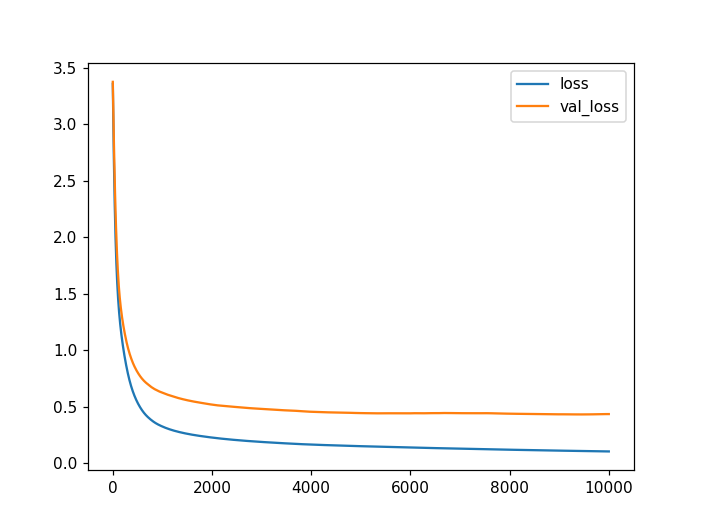

In [18]:
plt.figure()
plt.plot(history.epoch, history.history.get('loss'), label='loss')
plt.plot(history.epoch, history.history.get('val_loss'), label='val_loss')
plt.legend()
plt.show()
#plt.savefig('loss.jpg')

In [19]:
#模型训练结束后，预测是基于最终的一组参数，但可能效果最好的参数是前面的某一组，这里读取效果最好的参数进行预测
model.load_weights(checkpoint_save_path_transfer_free)
layer0 = model.layers[0].get_weights()
layer2 = model.layers[2].get_weights()
layer3 = model.layers[3].get_weights()
print(layer0[0][0,0],layer0[1][0])
print(layer2[0][0,0],layer2[1][0])
print(layer3[0][0,0],layer3[1][0])

-0.0025378596 0.03988906
-2.7425564e-32 -0.006205451
0.10491735 -0.09773576


In [20]:
y_train_predict = model.predict(x_train)
y_train_predict = np.array(y_train_predict).flatten()
y_test_predict = model.predict(x_test)
y_test_predict = np.array(y_test_predict).flatten()
# print(y_train.shape)
# print(y_train_predict)

<IPython.core.display.Javascript object>


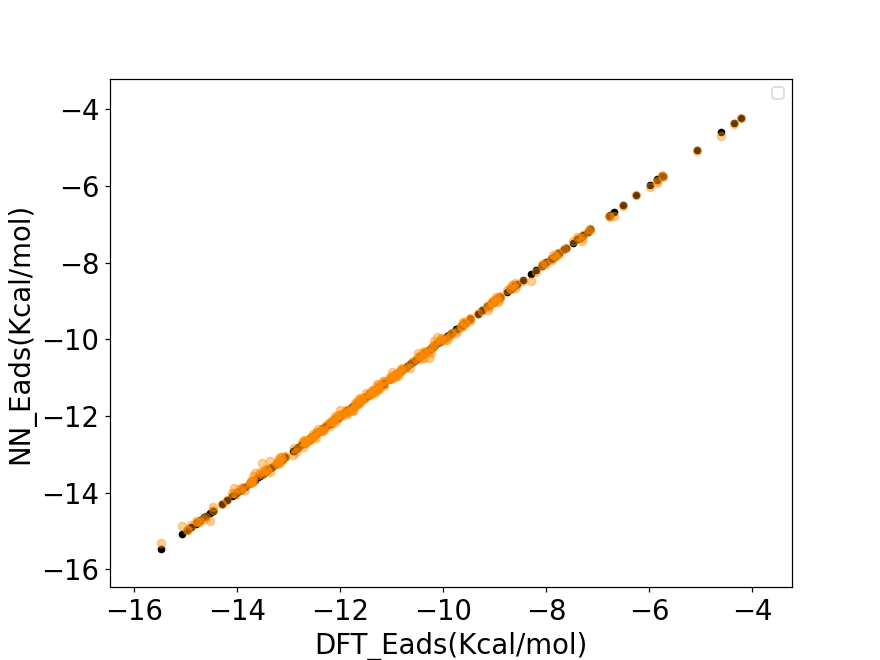

No handles with labels found to put in legend.
No handles with labels found to put in legend.


In [21]:
plt.figure(figsize=(8,6))
scale = 1
plt.xlim(min(y_train)-scale,max(y_train)+scale)
plt.ylim(min(y_train)-scale,max(y_train)+scale)

plt.scatter(y_train,y_train, color='black', s=16
#             ,linestyle='dotted'
#             ,label='DFT'
           )
plt.scatter(y_train, y_train_predict, s=28, alpha=0.4,color='darkorange'
#             ,label='NN_transform'
           )

plt.xlabel('DFT_Eads(Kcal/mol)',fontsize=18)
plt.ylabel('NN_Eads(Kcal/mol)',fontsize=18)

x1 = np.arange(min(y_train),max(y_train),0.5)
# plt.plot(x1,x1-3.6,label='y=x-3.6')
plt.legend()

plt.xticks(fontsize=18,rotation=0)
plt.yticks(fontsize=18)
plt.legend()
plt.savefig('./Adsorption_energy_train.png')

<IPython.core.display.Javascript object>


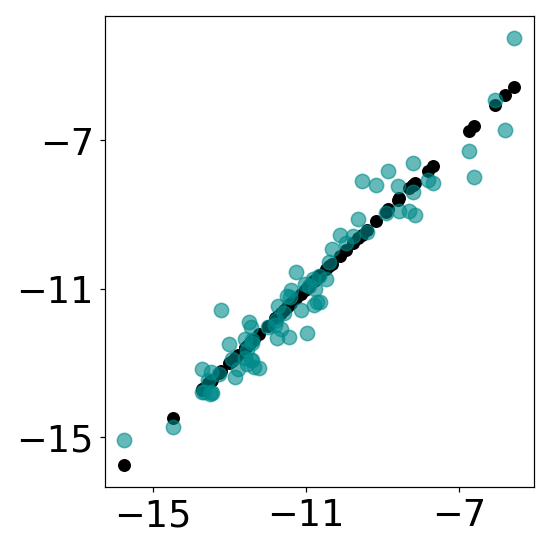

In [22]:
plt.figure(num=3,figsize=(5,5))
plt.scatter(y_test,y_test, color='black', s=56
#             ,linestyle='dotted'
#             ,label='DFT'
           )
plt.scatter(y_test,y_test_predict, s=88, alpha=0.6,color='darkcyan'
#             ,label='NN_transform'
           )

x1 = np.arange(min(y_test),max(y_test),0.5)
# plt.plot(x1,x1-3.6,label='y=x-3.6')
scale = 1
# plt.xlim(min(y_train)-scale,max(y_train)+scale)
# plt.ylim(min(y_train)-scale,max(y_train)+scale)

plt.xticks(np.arange(-15,-5,4),fontsize=24,rotation=0)
plt.yticks(np.arange(-15,-5,4),fontsize=24)

# plt.xlabel('DFT_Eads(Kcal/mol)',fontsize=18)
# plt.ylabel('NN_Eads(Kcal/mol)',fontsize=18)

plt.tight_layout()
# plt.legend()
plt.savefig('./Adsorption_energy_test.png',dpi=168, bbox_inches='tight')

In [23]:
print("训练集------MAE: ",sm.mean_absolute_error(y_train,y_train_predict))
print("测试集------MAE: ",sm.mean_absolute_error(y_test,y_test_predict))
print("训练集------MSE: ",sm.mean_squared_error(y_train,y_train_predict))
print("测试集------MSE: ",sm.mean_squared_error(y_test,y_test_predict))
print("训练集------RMSE: ",np.sqrt(sm.mean_squared_error(y_train,y_train_predict)))
print("测试集------RMSE:: ",np.sqrt(sm.mean_squared_error(y_test,y_test_predict)))
print("训练集------R2_score: ",sm.r2_score(y_train,y_train_predict))
print("测试集------R2_score:: ",sm.r2_score(y_test,y_test_predict))

训练集------MAE:  0.04342548465464195
测试集------MAE:  0.43895912151639654
训练集------MSE:  0.003673705003619595
测试集------MSE:  0.3272433216292517
训练集------RMSE:  0.060611096373680576
测试集------RMSE::  0.5720518522208032
训练集------R2_score:  0.9992487572168418
测试集------R2_score::  0.9296844290577057
